In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

# Compiling Individual Player Data

In [2]:
#we first want to compile all the individual players data into two large datasets to work with. one for defenders, and one for midfielders/attackers
att_path = 'Player_Data'

att_dataframe = []
if os.path.exists(att_path):
    for file in os.listdir(att_path):
        if file.endswith('.csv'):
            file_path = os.path.join(att_path, file)
            df = pd.read_csv(file_path)
            att_dataframe.append(df)
    final_df = pd.concat(att_dataframe, ignore_index=
                         True)
final_df.to_csv(os.path.join("", "att_finaldat.csv"))

In [3]:
def_path = os.path.join("Player_Data", "Defenders")

def_dataframe = []
if os.path.exists(def_path):
    for file in os.listdir(def_path):
        if file.endswith('.csv'):
            file_path = os.path.join(def_path, file)
            df = pd.read_csv(file_path)
            def_dataframe.append(df)
    final_df_def = pd.concat(def_dataframe, ignore_index= True)
    
final_df_def.to_csv(os.path.join("", "def_finaldat.csv"))

# Data Exploration (Attackers)

In [4]:
final_df.describe()

,Unnamed: 0,Matchweek,Minutes Played,Goals,Assists,Penalties Scored,Penalties Attempted,Shots,Shots on Target,Yellow Cards,...,loaned_in,loaned_out,offside,open_play_crosses,penalties_conceded,recoveries,tackled,tackles,target_missed,winning_goals
count,39673.000000,39673.000000,39673.000000,39673.000000,39673.00000,39673.000000,39673.000000,39673.000000,39673.000000,39673.000000,...,1971.0,1971.0,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,57.789227,19.531394,64.916417,0.152345,0.09475,0.013813,0.017115,1.278552,0.446626,0.120107,...,0.0,0.0,0.210553,0.174531,0.003551,3.723491,1.562659,0.582445,0.414003,0.034500
std,48.740601,10.993223,30.468864,0.413440,0.31820,0.120958,0.134847,1.448960,0.754051,0.329328,...,0.0,0.0,0.552622,0.464999,0.059504,3.127762,1.711563,0.969419,0.718915,0.182557
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,10.000000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,19.000000,80.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,87.000000,29.000000,90.000000,0.000000,0.00000,0.000000,0.000000,2.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,0.000000
max,249.000000,38.000000,90.000000,4.000000,4.00000,2.000000,2.000000,12.000000,6.000000,2.000000,...,0.0,0.0,5.000000,4.000000,1.000000,17.000000,10.000000,6.000000,5.000000,1.000000


In [5]:
final_df.head()

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,loaned_in,loaned_out,offside,open_play_crosses,penalties_conceded,recoveries,tackled,tackles,target_missed,winning_goals
0,0,2023-08-12,Sat,1,Home,W 4–1,Brighton,Luton Town,N,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023-08-19,Sat,2,Away,W 4–1,Brighton,Wolves,N,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023-08-26,Sat,3,Home,L 1–3,Brighton,West Ham,Y,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2023-09-02,Sat,4,Home,W 3–1,Brighton,Newcastle Utd,Y,FW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2023-09-16,Sat,5,Away,W 3–1,Brighton,Manchester Utd,N,RW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Can see that some columns have NaN, so we want to have a look at how many columns contain null values

In [6]:
nan_columns = final_df.isna().sum()
nan_columns = nan_columns[nan_columns != False]
nan_columns = nan_columns.reset_index()
nan_columns.columns = ['Column Name', 'NaN Count']
print(nan_columns)

                        Column Name  NaN Count
0                          Position          2
1                  attempted_passes      37702
2               big_chances_created      37702
3                big_chances_missed      37702
4   clearances_blocks_interceptions      37702
5                  completed_passes      37702
6                          dribbles      37702
7                          ea_index      37702
8            errors_leading_to_goal      37702
9    errors_leading_to_goal_attempt      37702
10                            fouls      37702
11                               id      37702
12                       key_passes      37702
13           kickoff_time_formatted      37702
14                        loaned_in      37702
15                       loaned_out      37702
16                          offside      37702
17                open_play_crosses      37702
18               penalties_conceded      37702
19                       recoveries      37702
20           

The position column only has 2 NaN's, but the other columns have majority of the observations being NaN. I suspect this is due to the difference in data that is available throughout the years (big chance created data etc. is available for more recent seasons, but wasn't available previously. We can probably remove the features that have majority of their observations being NaN)

In [7]:
#this code first drops the column that contains info about how many NaN's in each feature. we then also drop the first row, because we would like to keep the 'position' feature for now. Finally, turn the 
#dataframe into a list, so that we can easily use the column names to remove them from the final_df
nan_columns = nan_columns.drop(nan_columns.columns[1], axis = 1)
nan_columns = nan_columns.drop(index = 0)
nan_columns = nan_columns['Column Name'].tolist()

In [8]:
final_df = final_df.drop(columns = nan_columns)

We now want to investigate the two NaN's in the position feature

In [9]:
#pd.set_option('display.max_columns', None)
final_df[final_df['Position'].isna()]

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,kickoff_date
2469,76,2021-01-20,Wed,1,Home,W 2–0,Manchester City,Aston Villa,N,NaN,...,19,0,109790,19.0,4,13192,24289,11097,91,2021-01-20
34170,122,2021-01-12,Tue,1,Home,L 0–1,Burnley,Manchester Utd,N,NaN,...,18,0,23787,0.0,1,-1159,115,1274,57,2021-01-12


By looking at the data manually, we can input positions for these two observations. 
* 2469 - Gabriel Jesus - LW
* 34170 - Dwight McNeil - LW 

In [10]:
final_df.loc[2469, 'Position'] = 'LW'
final_df.loc[34170, 'Position'] = 'LW'

#just checking to make sure the inputation worked 
final_df[final_df['Position'].isna()]

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,kickoff_date


In [11]:
final_df.head(8)

,Unnamed: 0,Date,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,kickoff_date
0,0,2023-08-12,Sat,1,Home,W 4–1,Brighton,Luton Town,N,FW,...,1,0,559185,37.0,5,0,0,0,60,2023-08-12
1,1,2023-08-19,Sat,2,Away,W 4–1,Brighton,Wolves,N,FW,...,2,0,593303,4.0,1,-16405,37439,53844,60,2023-08-19
2,2,2023-08-26,Sat,3,Home,L 1–3,Brighton,West Ham,Y,FW,...,3,0,506600,70.0,2,-95362,22125,117487,60,2023-08-26
3,3,2023-09-02,Sat,4,Home,W 3–1,Brighton,Newcastle Utd,Y,FW,...,4,0,453114,52.0,17,-60023,11535,71558,59,2023-09-02
4,4,2023-09-16,Sat,5,Away,W 3–1,Brighton,Manchester Utd,N,RW,...,5,0,765758,17.0,1,272535,355471,82936,60,2023-09-16
5,5,2023-09-24,Sun,6,Home,W 3–1,Brighton,Bournemouth,Y,FW,...,6,0,802885,9.0,1,34133,111860,77727,60,2023-09-24
6,6,2023-09-30,Sat,7,Away,L 1–6,Brighton,Aston Villa,Y,FW,...,7,0,779047,0.0,1,-28049,75147,103196,60,2023-09-30
7,7,2023-10-08,Sun,8,Home,D 2–2,Brighton,Liverpool,Y,FW,...,8,0,709129,1.0,1,-71612,33271,104883,60,2023-10-08


A quick look at the first 5 rows yields the following observations
* The first column (Unnamed:0) can be removed, because it is just the index for the individual player dataframes 
* The 'Date' column can be removed, since this information is duplicated in the 'kickoff_time' column, for the same reason we can remove the 'kickoff_date' column
* The 'minutes' column can be removed, as this gives the same information as the 'Mins Played' column 
* The 'round' column can be removed, as this gives the same information as the 'Matchweek' column 


In [12]:
final_df = final_df.drop(columns = ['Unnamed: 0', 'Date', 'kickoff_date', 'minutes', 'round'])
final_df.head()

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,kickoff_time,own_goals,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value
0,Sat,1,Home,W 4–1,Brighton,Luton Town,N,FW,13,1,...,2023-08-12 14:00:00+00:00,0,0,559185,37.0,5,0,0,0,60
1,Sat,2,Away,W 4–1,Brighton,Wolves,N,FW,24,0,...,2023-08-19 14:00:00+00:00,0,0,593303,4.0,1,-16405,37439,53844,60
2,Sat,3,Home,L 1–3,Brighton,West Ham,Y,FW,90,0,...,2023-08-26 16:30:00+00:00,0,0,506600,70.0,2,-95362,22125,117487,60
3,Sat,4,Home,W 3–1,Brighton,Newcastle Utd,Y,FW,80,3,...,2023-09-02 16:30:00+00:00,0,0,453114,52.0,17,-60023,11535,71558,59
4,Sat,5,Away,W 3–1,Brighton,Manchester Utd,N,RW,6,0,...,2023-09-16 14:00:00+00:00,0,0,765758,17.0,1,272535,355471,82936,60


We now want to take a look at the data types of our remaining features, and then make any adjustments if necessary

In [13]:
final_df_datatypes = final_df.dtypes.reset_index()
final_df_datatypes.columns = ['Column Name', 'Data Type']

#pd.set_option('display.max_rows', None)
final_df_datatypes

,Column Name,Data Type
0,Day,object
1,Matchweek,int64
2,Venue,object
3,Result,object
4,Team,object
...,...,...
102,total_points,int64
103,transfers_balance,int64
104,transfers_in,int64
105,transfers_out,int64


Looking at this, the main column we want to change right away is 'kickoff_time' into a datetime64 object. The rest we can leave for now

In [14]:
final_df['kickoff_time'] = pd.to_datetime(final_df['kickoff_time'])

Prior to actually exploring the data, we need to separate our dataset into training and test sets, so we don't draw any conclusions from data that is supposed to be unseen. 

In [15]:
from sklearn.model_selection import train_test_split
att_train, att_test = train_test_split(final_df, test_size = 0.2, random_state = 66)

We also make a copy of att_train for the purpose of data exploration. We can safely manipulate and make changes to this duplicated dataframe, without worrying about it having any impact on the original training set. 

In [16]:
att_explore = att_train

In [17]:
att_explore.head()

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,kickoff_time,own_goals,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value
10000,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,90,0,...,2022-04-10 13:00:00+00:00,0,0,6955,36.0,2,27,343,316,54
24977,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,23,0,...,2020-03-07 12:30:00+00:00,0,0,24392,0.0,1,-359,133,492,52
37756,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,90,0,...,2018-05-06 12:30:00+00:00,0,0,10349,0.0,3,-47,129,176,44
18759,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,25,0,...,2022-04-24 13:00:00+00:00,0,0,19229,5.0,1,-1446,288,1734,58
168,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,84,0,...,2020-07-26 15:00:00+00:00,0,0,801163,101.0,3,198047,228466,30419,75


### 'Day' Feature Exploration

Our initial goal is to use the data available to predict the number of goals scored. We can start by exploring the relationships between each of the features and goals scored. We start off by looking at the relationship between the 'Day' feature and the 'Goals' feature. 

In [18]:
att_explore['Day'].unique()

array(['Sun', 'Sat', 'Mon', 'Wed', 'Fri', 'Tue', 'Thu'], dtype=object)

In [19]:
att_explore['Day'].value_counts()

Day
Sat    15337
Sun     8120
Wed     2752
Tue     1835
Mon     1790
Thu     1016
Fri      888
Name: count, dtype: int64

In [20]:
goals_by_day = att_explore.groupby(['Day', 'Goals']).size().unstack(fill_value = 0)

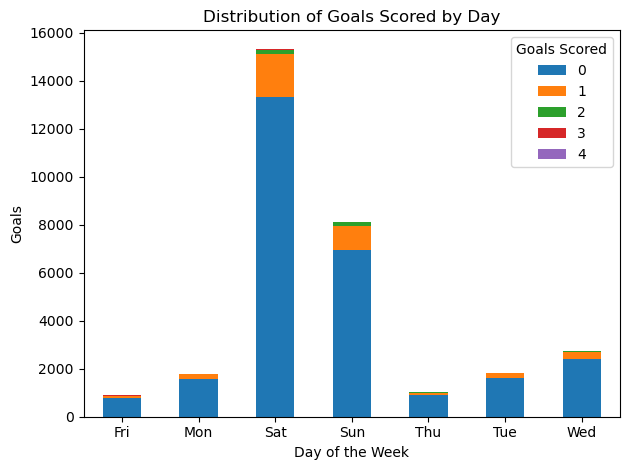

In [21]:
fig, ax = plt.subplots()

goals_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

First of all, we can see that majority of the games are played on either a Saturday or a Sunday which makes sense. Although it may appear that Saturdays and Sundays have a greater proportion of goals scored, this is not the case. It only appears that way because the Sat/Sun bar is quite a bit longer. This is made evident if we produce a similar plot, but this time we plot the proportion of the number of goals scored each day. 

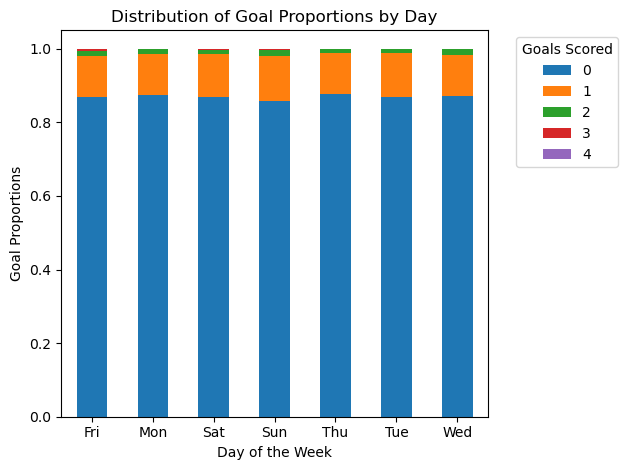

In [22]:
goalprop_by_day = goals_by_day.div(goals_by_day.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it clear that the proportion of goals scored does not really differ across the days. In other words, it doesn't appear that there is any relation between the number of goals scored, and the day the game was played. Another thing we can do to further investigate this is to group the observations by whether or not the game was played on a weekend, or on a weekday. In general, weekend games are much more common, as midweek games only happen in special circumstances such as rearranged fixtures or double gameweeks. Perhaps there is a difference in the number of goals scored when grouping the data in this manner. 

In [23]:
def categorize_day(day):
    if day in ['Sat', 'Sun']:
        return 'Weekend'
    else:
        return 'Weekday'

goalprop_by_daytype = att_explore[['Day', 'Goals']]


/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_66014/1867152727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)


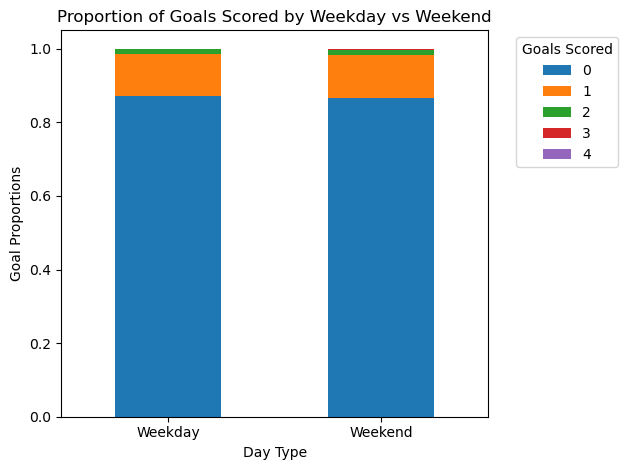

In [24]:
goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)

goals_by_daytype = goalprop_by_daytype.groupby(['DayType', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_daytype = goals_by_daytype.div(goals_by_daytype.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()
goalprop_by_daytype.plot(kind = 'bar', stacked = True, ax = ax)

ax.set_title('Proportion of Goals Scored by Weekday vs Weekend')
ax.set_xlabel('Day Type')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Once again, we can see that the proportion of goals scored by day type is essentially identical. Therefore, there is strong justification to say that the day the game was played does not have any impact on the number of goals scored. If building a model to predict the number of goals scored, we can remove this feature from consideration. 

### 'Matchweek' Feature Exploration

We now have a look at the relationship between goals scored and the matchweek where the game occurred. We don't anticipate there to be much relationship between this feature and the target variable. This is primarily for two reasons. The first reason is that the matchweek isn't necessarily representative of the order in which the games were played in. For example, rearranged games will keep their initial matchweek number (which is the original order of the fixtures when published at the beginning of the season), but may be played in non-consecutive order (so if the matchweek 5 game was rearranged to be played in February instead of September, it will still be classified as matchweek 5). Therefore, the only information that the 'Matchweek' feature is telling us is the initial fixture order. 

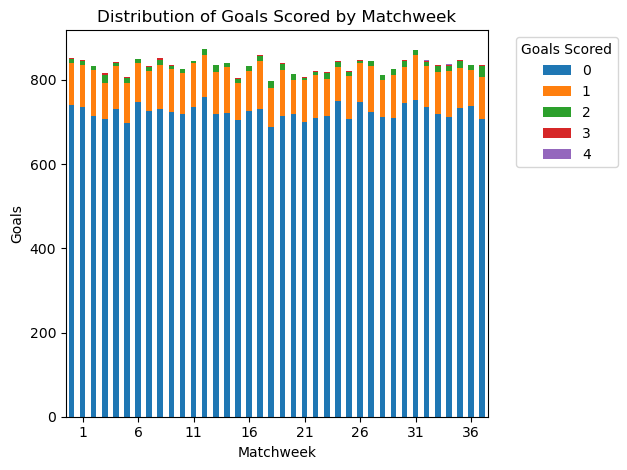

In [25]:
goals_by_matchweek = att_explore.groupby(['Matchweek', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_matchweek.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Matchweek')
ax.set_xlabel('Matchweek')

#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 38, 5))
ax.set_xticklabels(range(1, 38, 5))

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

As expected, there doesn't seem to be any particular relationship betweeen the number of goals scored and the matchweek. As there is no real logical way to categorise or transform the 'Matchweek' feature, we can conclude that this is another feature that is under strong consideration to be removed. 

### 'Venue' Feature Exploration

Our initial expectation is that there may be a relationship between the venue (whether or not the game was played home or away), and the number of goals scored. Typically, we expect teams (and therefore players) to perform better and score more goals when playing at home. Therefore, we expect to see a higher proportion of goals scored for observations that are categorised as playing at home. 

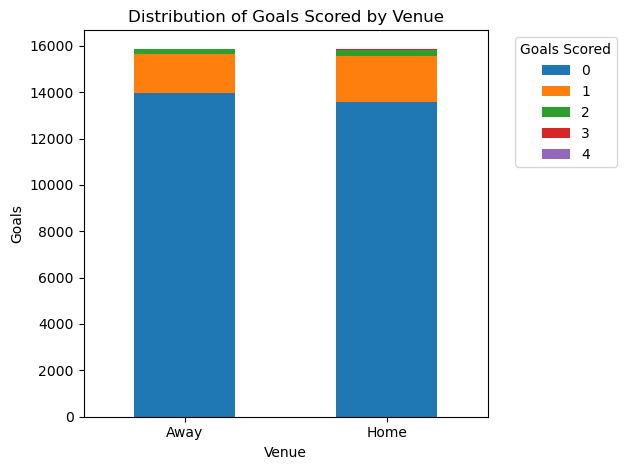

In [26]:
goals_by_venue = att_explore.groupby(['Venue', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_venue.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Venue')
ax.set_xlabel('Venue')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Perhaps surprisingly, we are not seeing any major difference between the number of goals scored at home compared to away from home. The plot does show that slightly more goals are scored at home compared to away, but this difference is perhaps not as pronounced as expected. 

### 'Result' Feature Exploration

In [27]:
att_explore['Result']

10000    L 1–2
24977    L 1–2
37756    D 0–0
18759    D 2–2
168      W 5–0
         ...  
31381    L 0–2
5199     W 3–0
8243     L 1–4
8823     L 0–4
25620    D 1–1
Name: Result, Length: 31738, dtype: object

We can see that the 'Result' feature is currently a dtype object, with information for both the final score (number of goals scored for each team), as well as the final result (win, loss or draw) in the same feature. We want to perhaps separate this feature, so that we can individually explore the relationship between goals scored and the final score/final result. 

In [28]:
#create new dataframe with just result and goals 
att_explore_result = att_explore[['Result', 'Goals']].copy()

#strip the result column of any whitespace, to make it easier to process the string 
att_explore_result.loc[:, 'Result'] = att_explore_result['Result'].str.strip()

#use str.extract method to extract the relevant strings from the result column. the purpose of this is to create two new features (outcome and score)
att_explore_result[['Outcome', 'Score']] = att_explore_result['Result'].str.extract(r'([LWD])\s+(\d+[–-]\d+)')

#drop the result column, as we no longer need this 
att_explore_result = att_explore_result.drop('Result', axis = 1)

#replace the dash in the score column with a hyphen, to make it easier to work with in the future 
att_explore_result['Score'] = att_explore_result['Score'].str.replace('\u2013', '-', regex = True)

att_explore_result.head()

,Goals,Outcome,Score
10000,0,L,1-2
24977,0,L,1-2
37756,0,D,0-0
18759,0,D,2-2
168,0,W,5-0


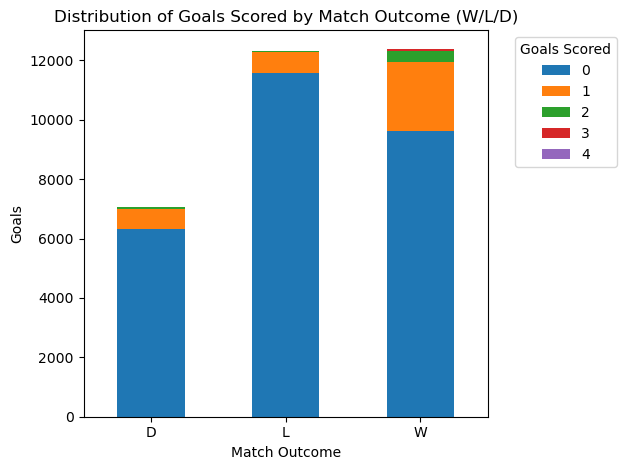

In [29]:
goals_by_outcome = att_explore_result.groupby(['Outcome', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Match Outcome (W/L/D)')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

It is perhaps unsurprising to see that the proportion of goals scored seems to be highest when the match outcome is a Win, compared to when the match outcome is either a Loss or a Draw. We can take a look further at the proportion of goals scored, when categorised by the match outcome. 

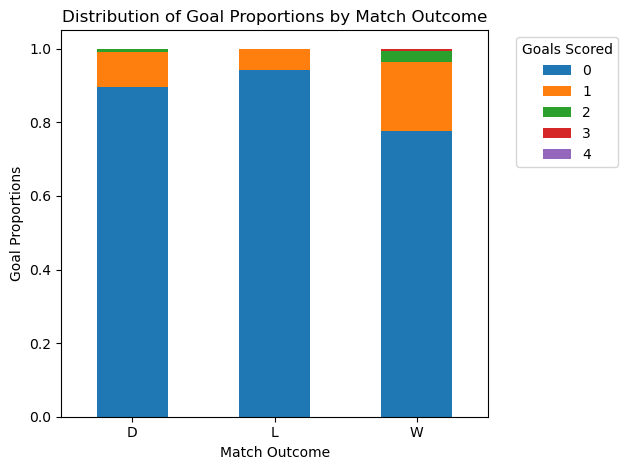

In [30]:
goalprop_by_outcome = goals_by_outcome.div(goals_by_outcome.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Match Outcome')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it even more obvious that the proportion of goals scored is highest when the final outcome is a win. THe lowest proportion of goals scored is when the final outcome is a loss, whilst the proportion of goals scored is in the middle if the final outcome is a draw. Whilst this is useful to know, it doesn't really help with building a model to predict the number of goals scored, as this information is only available 'after' a game has been played. However, it may still be useful to include in the model, because we can then incorporate team strength models to aid with the prediction, i.e. feed into the model the probability that a team will win a particular game (as this will be known prior to the game), and using that to adjust the predictions. 

In [31]:
att_explore_result['Score'].unique()

array(['1-2', '0-0', '2-2', '5-0', '4-1', '3-6', '1-0', '0-3', '0-1',
       '0-4', '2-1', '3-0', '1-1', '3-1', '1-3', '2-0', '2-3', '4-2',
       '1-4', '5-2', '0-2', '3-2', '3-5', '1-5', '4-0', '5-1', '4-3',
       '3-4', '5-3', '0-5', '2-5', '3-3', '1-6', '2-4', '0-9', '4-4',
       '6-1', '0-6', '7-0', '6-0', '6-3', '9-0', '5-4', '0-7', '6-2',
       '8-0', '7-2', '2-6', '4-5', '2-7', '0-8'], dtype=object)

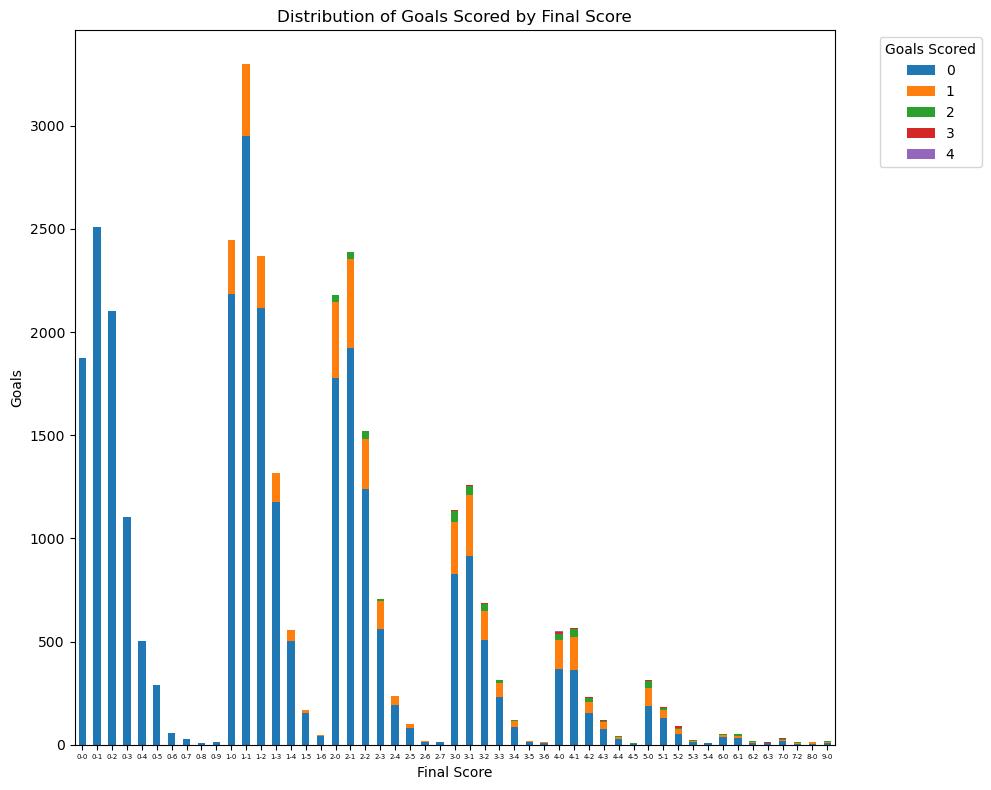

In [32]:
goals_by_score = att_explore_result.groupby(['Score', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

To the left of the plot, we have the results where the teams did not score a goal (0-0 to 0-9). We can try remove these observations, as the fact that the proportion of goals scored is zero when the team did not score any goals is not particularly useful information. 

In [33]:
goals_by_score = goals_by_score.reset_index()
goals_by_score = goals_by_score[~goals_by_score.iloc[:,0].str.split('-').str[0].astype(int).eq(0)]
goals_by_score = goals_by_score.set_index('Score')

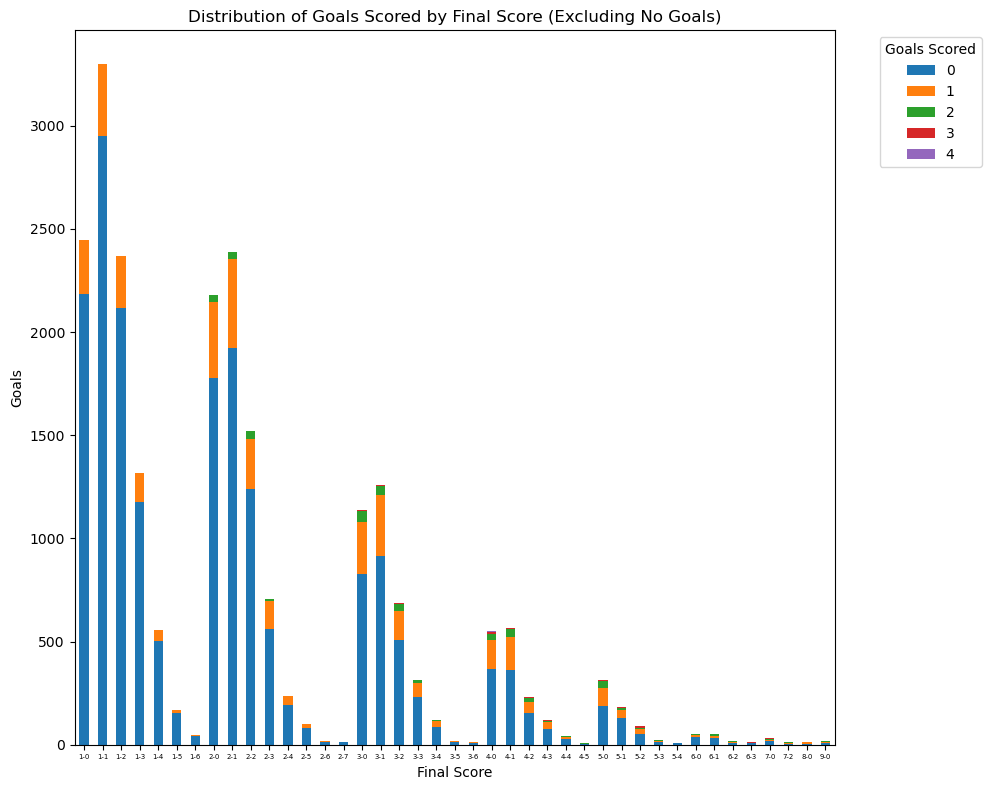

In [34]:
fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score (Excluding No Goals)')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

This plot is quite difficult to read, because of the wide range in the lengths of the bars. Let's plot the proportion of goals scored instead, to help with both readability and interpretability. 

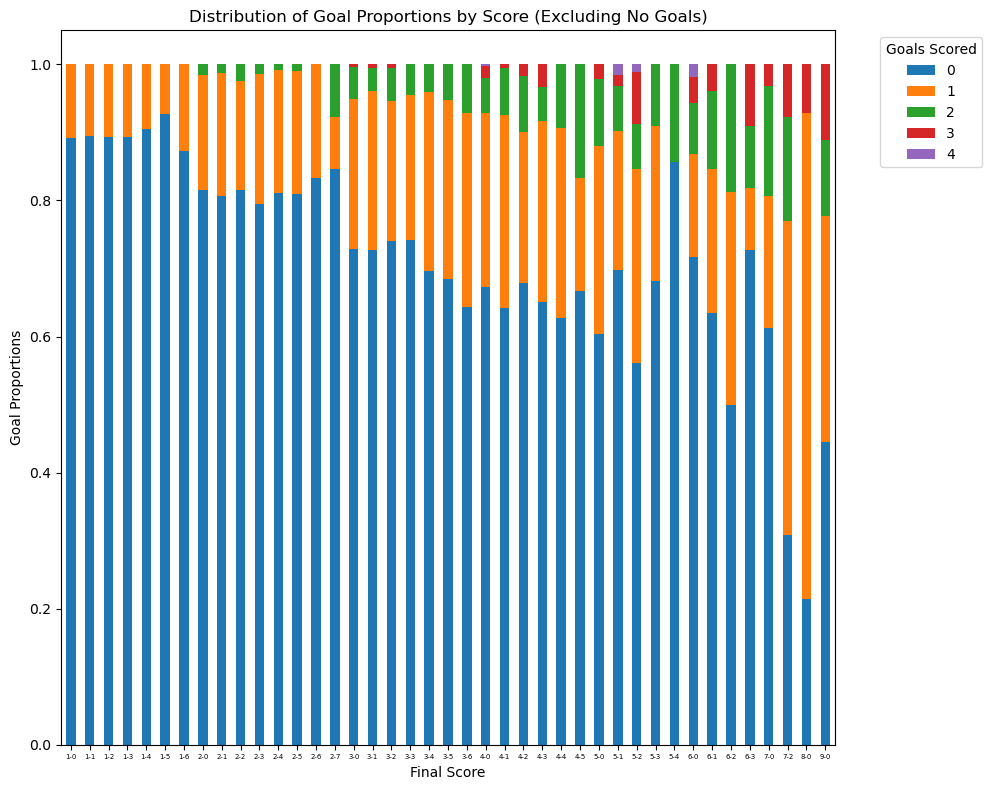

In [35]:
goalprop_by_score = goals_by_score.div(goals_by_score.sum(axis = 1), axis = 0)
fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Score (Excluding No Goals)')
ax.set_xlabel('Final Score')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

The graph clearly shows that as the proportion of goals scored increases as the number of goals your team scores increases. Again, this may not be particularly revalatory, but it is still valuable information. We have the same problem where we don't know the final score prior to the match being played, meaning this feature may not be particularly useful when building the predictive model. However same as before, we can use other models that predict the scores prior to a match being played as information. 

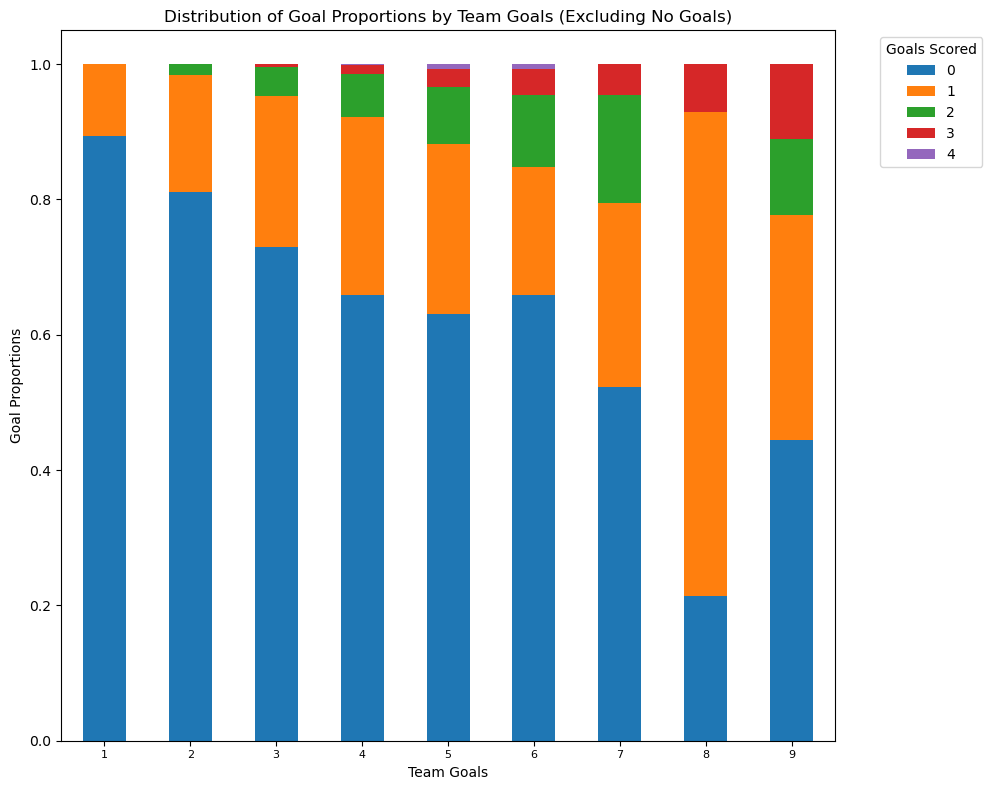

In [36]:
#adding another column called 'Team Goals', which is equivalent to the number of goals scored by the team in a particular match
goals_by_score = goals_by_score.reset_index()
goals_by_score['Team Goals'] = goals_by_score['Score'].str.split('-').str[0]
goals_by_score = goals_by_score.set_index('Score')

#grouping by team goals 
goals_by_teamgoals = goals_by_score.groupby('Team Goals').sum()

#getting the proportion of goals scored when grouped by team goals 
goalprop_by_teamgoals = goals_by_teamgoals.div(goals_by_teamgoals.sum(axis = 1), axis = 0)


fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_teamgoals.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team Goals (Excluding No Goals)')
ax.set_xlabel('Team Goals')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 8)
plt.tight_layout()
plt.show()

Same pattern as identified above. The more goals your team scores in a particular match, the greater the proportion of observations that have goals being scored. 

### 'Team' Feature Exploration

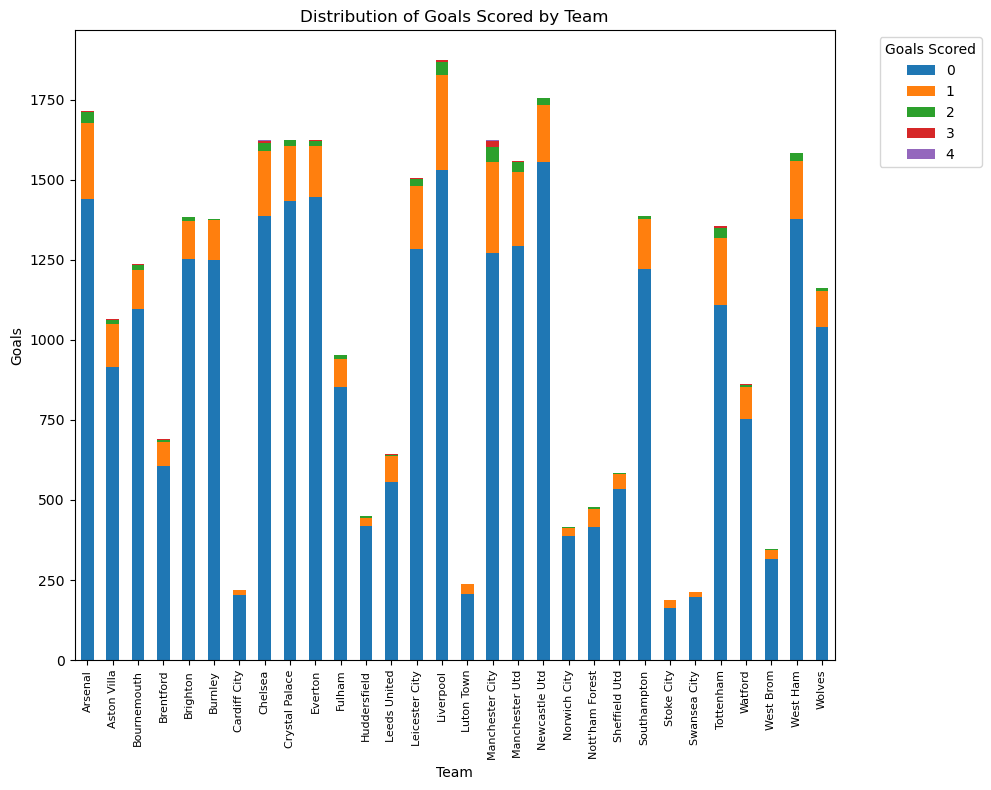

In [37]:
goals_by_team = att_explore.groupby(['Team', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Team')
ax.set_xlabel('Team')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

At first glance, it appears that there are certain teams that are associated with more observations that have goals being scored. Once again, we can instead plot the proportion of goals scored by each team for better interpretability 

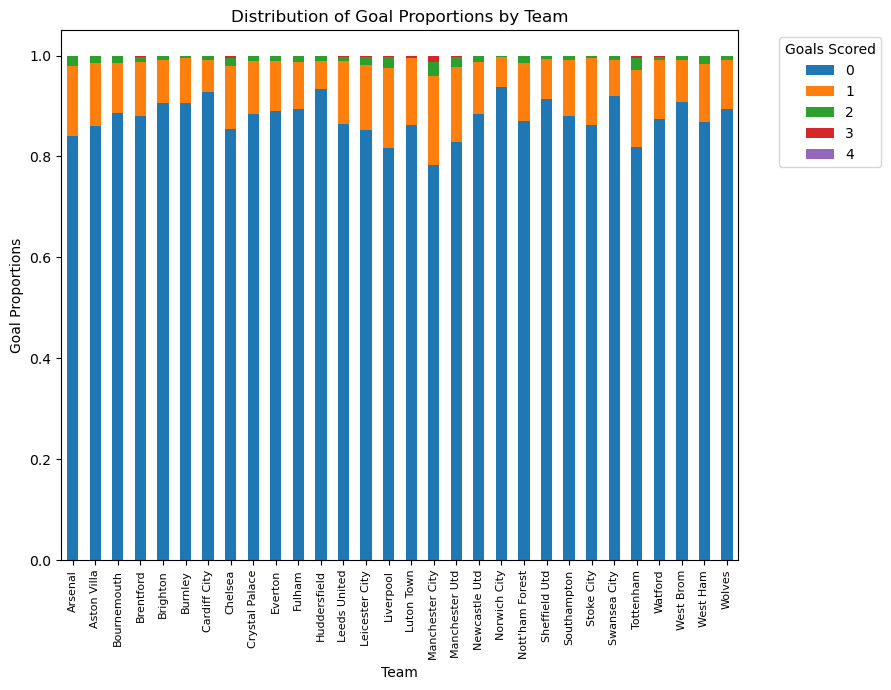

In [38]:
goalprop_by_team = goals_by_team.div(goals_by_team.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team')
ax.set_xlabel('Team')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Can see that teams such as Arsenal, Chelsea, Liverpool, Manchester City and Tottenham have greater proportions of non-zero goal observations. This makes sense because these are considered to be the top teams in the league. This shows us that it is likely that team strength/ability likely plays into the probability that a particular player will score in a given game (the stronger the team, the more likely that they will score). 

### 'Opponent' Feature Exploration

We repeat the above analysis but this time for the opponents faced. Once again, we expect a similar pattern where there will be teams faced that lead to a greater proportion of goals scored. This is because certain teams will be weaker, meaning it is more likely that goals will be scored against them. 

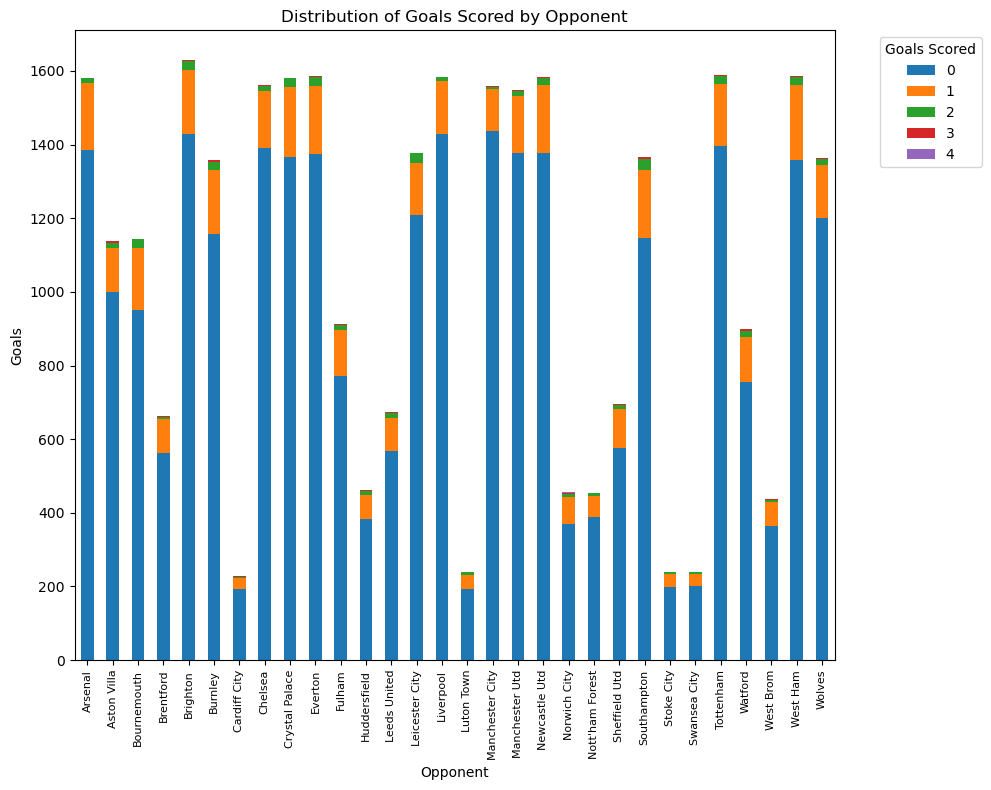

In [39]:
goals_by_opponent = att_explore.groupby(['Opponent', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent')
ax.set_xlabel('Opponent')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

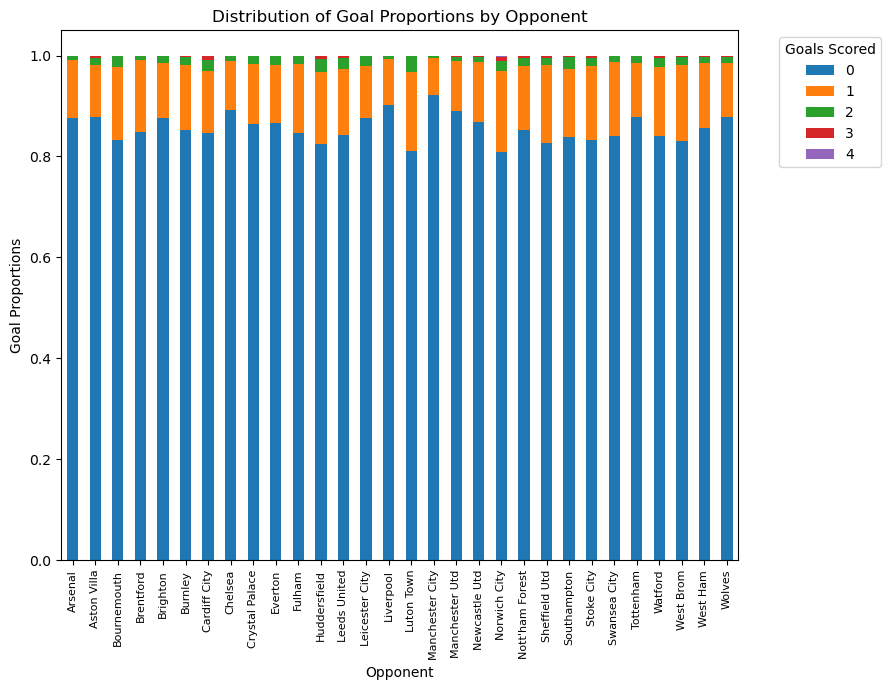

In [40]:
goalprop_by_opponent = goals_by_opponent.div(goals_by_opponent.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent')
ax.set_xlabel('Opponent')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There is definitely some variation, but the effect doesn't seem to be as pronounced as expected. For example, we expect Arsenal to be a better team than Brighton on average, therefore we expect a fewer proportion of goals to be scored when facing Arsenal as an opponent compared to facing Brighton as an opponent. However, the plot above shows that there appears to be a similar proportion of goals scored when facing Arsenal and Brighton. One reason for this is because teams have variation in their performance across the seasons. For example, there are certain seasons where Arsenal are considered to be one of the top teams in the league, but other seasons where they are a much more middling opposition. To investigate this, we can try plot the proportion of goals scored against an opponent based on the opponent's final place in the table at the end of the season. 

In [41]:
def determine_season(date):
    seasons = ('2024-2025', '2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018')
    matching = [s for s in seasons if str(date.year) in s]
    dynamic_timestamp = pd.Timestamp(f'{date.year}-08-01').tz_localize('GMT')
    
    if dynamic_timestamp <= date:
        return(matching[0])
    else: 
        return(matching[1])

In [42]:
#loading prem_table as a dataframe from source
prem_table = pd.read_csv('prem_table.csv', usecols = [1,2,3])

#adding a new column into att_explore which tells us which season a particular observation belongs to 
att_explore['Season'] = att_explore['kickoff_time'].apply(determine_season)

#creating a new dataframe called 'merged', which merges information from the prem_table dataframe and the att_explore dataframe
merged = att_explore.merge(prem_table, left_on = ['Opponent', 'Season'], right_on = ['Team', 'Season'], how = 'left')

#opp_pos is now a list, which we can then attach back onto att_explore 
opp_pos = merged['Position_y'].tolist()
att_explore['Opponent Position'] = opp_pos

We can now plot goals by opponent position, instead of just by opponent

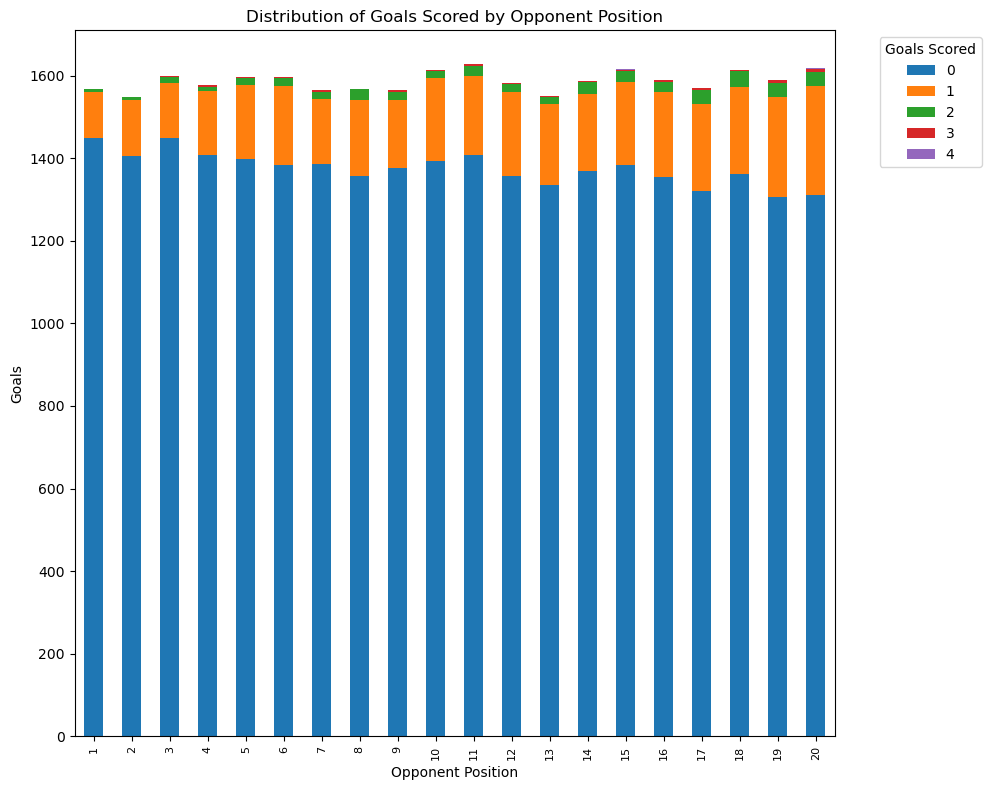

In [43]:
goals_by_opponentpos = att_explore.groupby(['Opponent Position', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent Position')
ax.set_xlabel('Opponent Position')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see a relatively clear pattern that shows that the lower the opponent's final position at the end of the season, the greater the proportion of goals is scored when facing them. This should be made even more clear if we plot the proportion of goals scored by opponent position. 

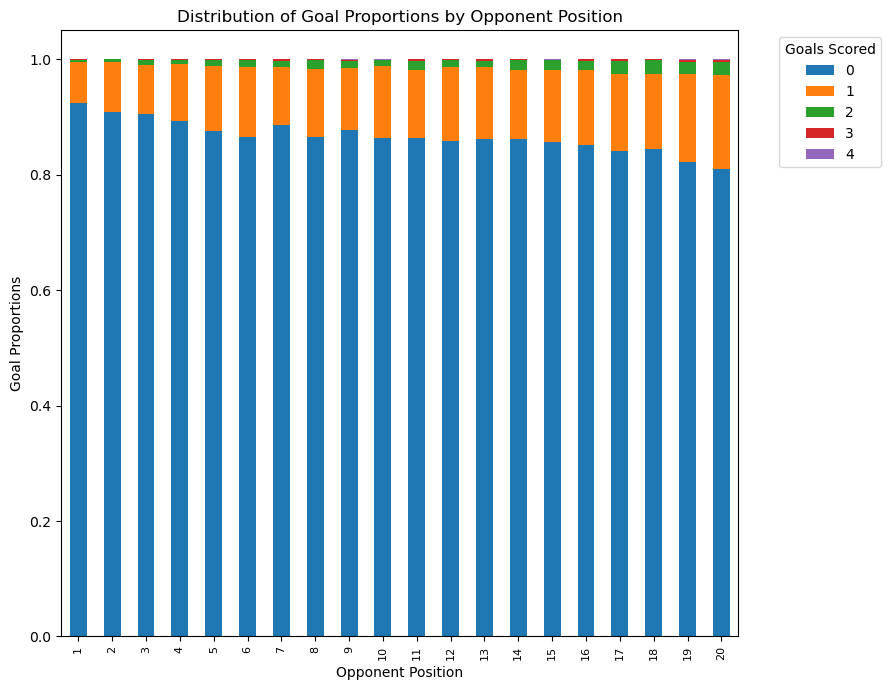

In [44]:
goalprop_by_opponentpos = goals_by_opponentpos.div(goals_by_opponentpos.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent Position')
ax.set_xlabel('Opponent Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

One limitation of this analysis is that it doesn't necessarily capture the ebs and flows that a team goes through throughout a season. For example, the team that ended up finishing 20th might have had a really good start to the season, and were considered to be one of the stronger teams initially. But because of injuries to key players, the team got a lot weaker throughout the season, eventually leading to them finishing 20th. In this case, facing this team at the beginning of the season would've been a much more difficult game than facing them at the end of the season. 

### 'Start' Feature Exploration

'Start' is a feature that tells us whether or not a given player started a game or not. The general consensus is that players that start games are more likely to score. This is because they are generally on the pitch for a longer period of time. 

In [45]:
att_explore['Start'].unique()

array(['Y', 'N', 'Y*'], dtype=object)

We can see that the 'Start' feature has 3 columns. 
* Y = This player started this game 
* N = This player did not start this game 
* Y* = This player started the game as club captain


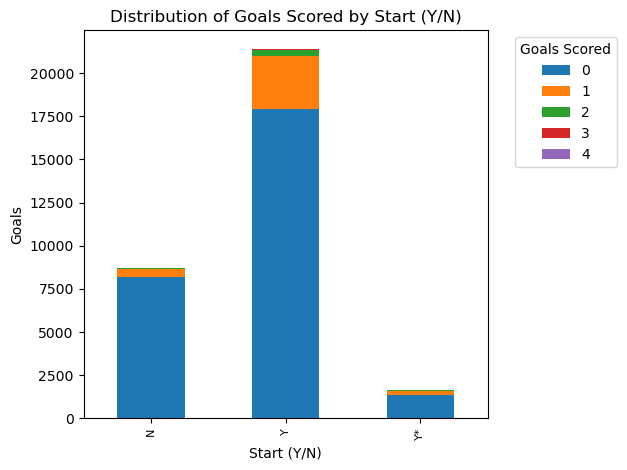

In [46]:
goals_by_start = att_explore.groupby(['Start', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

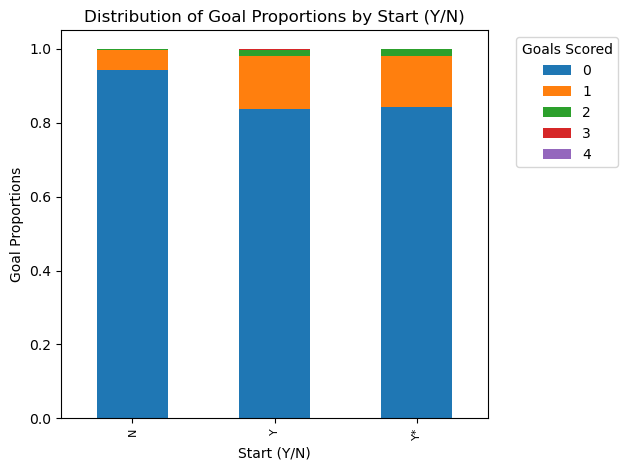

In [47]:
goalprop_by_start = goals_by_start.div(goals_by_start.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There are two key observations, the first is that the proportion observations with goals scored is higher when the player starts a game, compared to if they didn't start the game. This is as expected. The other observation is that it starting the game as the team captain does not necessarily have any effect on the proportion of goals scored. Therefore, we can probably combine the Y and Y* observations together, since being a captain is unlikely to have any effect on the player scoring a goal in a particular game. 

### 'Position' Feature Exploration

In [112]:
positions = att_explore['Position'].unique()
positions

array(['DM', 'LW', 'CM', 'LM', 'FW', 'DM,AM', 'AM', 'RM', 'CM,AM',
       'DM,CM', 'RW', 'FW,RW', 'AM,LW', 'RW,WB', 'RW,LW', 'CM,LM',
       'LM,FW', 'FW,AM', 'RM,CM', 'AM,DM', 'LW,RW', 'RB', 'LW,LM',
       'LM,CM', 'CM,DM', 'RW,RM,WB', 'RM,DM,CM', 'LM,LW', 'AM,CM',
       'WB,LM,CM', 'RM,RW', 'RM,LM,AM', 'RW,LM,CM', 'DM,RB', 'LW,DM',
       'LM,AM', 'CM,DM,AM', 'WB,FW', 'RB,DM,CM,RM', 'FW,LM', 'WB',
       'DM,CM,AM', 'LM,CM,DM', 'CM,RB', 'AM,FW', 'CB', 'DM,RM', 'RW,RM',
       'RM,LB', 'FW,RM', 'LB', 'FW,LW', 'CM,RM', 'AM,LB', 'DM,CB',
       'RW,AM', 'FW,CM', 'CM,RM,WB', 'RM,LM', 'CM,RM,LM', 'RW,FW',
       'LW,CM', 'LW,FW', 'AM,RM', 'FW,AM,LW', 'LW,WB', 'DM,LM',
       'LM,RM,LW', 'WB,AM', 'RB,CM', 'LM,DM', 'AM,RW', 'RM,AM', 'CM,FW',
       'LW,LB', 'LM,RM', 'FW,CM,AM', 'RB,RM', 'RM,FW', 'RW,LW,FW',
       'LW,CB', 'RM,LW', 'RM,LW,AM', 'RM,LM,CM', 'RW,LW,LM', 'LW,AM',
       'FW,RB', 'RB,RM,CM', 'RM,DM', 'CM,LW', 'CM,RW', 'AM,RW,LW',
       'WB,RW', 'LB,RW', 'LB,LW,RW', 'LM,DM,CM'

We can see that there are quite a few unique positions. This is down to the fact that certain observations may be recorded to have played multiple positions in one game. We want to first isolate how many unique positions there are. 

In [49]:
unique_positions = set()

for position in positions:
    for pos in position.split(','):
        unique_positions.add(pos.strip())
        
unique_positions = list(unique_positions)

print(unique_positions)

['DM', 'CB', 'LM', 'RM', 'LB', 'LW', 'AM', 'CM', 'RB', 'RW', 'FW', '0', 'WB']


So we have 12 unique positions, and '0' for some reason. Let's first investigate the observations that have '0' in their position. 

In [50]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,Season,Opponent Position
7668,Sat,28,Home,L 2–4,Wolves,Leeds United,N,0,0,0,...,0,16256,0.0,-3,-92,423,515,48,2022-2023,19
17110,Tue,1,Home,L 0–1,Burnley,Manchester Utd,N,0,11,0,...,0,45067,28.0,1,-428,2482,2910,48,2020-2021,2
3733,Tue,1,Home,L 0–1,Burnley,Manchester Utd,N,0,3,0,...,0,18618,2.0,1,-1092,120,1212,58,2020-2021,2
26879,Wed,1,Home,W 2–0,Manchester City,Aston Villa,N,0,19,0,...,0,272796,6.0,1,-29133,14713,43846,81,2020-2021,11


From looking at these games individually, we can manually fill in the positions played by these players. 

* 7668 - Player Sent Off on Bench 
* 17110 - FW
* 3733 - FW
* 26879 - RW

So we will remove observation 7668, since this player did not play

In [51]:
att_explore = att_explore.drop(index = 7668)

In [52]:
att_explore.loc[17110, 'Position'] = 'FW'
att_explore.loc[3733, 'Position'] = 'FW'
att_explore.loc[26879, 'Position'] = 'RW'

We can now confirm that there are no longer any observations that have '0' entry in Positions 

In [53]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,Season,Opponent Position


One issue with the data is that we don't know how many minutes of a game were played in each position, for a player that has been listed as playing multiple positions in a game. For example, if a player is played in the FW position for 85 minutes of the game, before tactical adjustments mean that they play in the LB position for the remainder of the game, the data might be skewed to show that LB's have better attacking potential than what it may be in reality. Unfortunately, there isn't any data that allows us to input the 'primary' position of a player in a particular game. Therefore, the best way to proceed at this stage is to first one-hot encode the position column. 

In [54]:
positions = att_explore['Position']

positions_df = pd.DataFrame(positions, columns = ['Position'])

positions_encode = positions_df['Position'].str.get_dummies(sep = ',')

In [55]:
print(positions_encode)

       AM  CB  CM  DM  FW  LB  LM  LW  RB  RM  RW  WB
10000   0   0   0   1   0   0   0   0   0   0   0   0
24977   0   0   0   0   0   0   0   1   0   0   0   0
37756   0   0   1   0   0   0   0   0   0   0   0   0
18759   0   0   0   0   0   0   1   0   0   0   0   0
168     0   0   0   0   0   0   1   0   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
31381   0   0   1   1   0   0   1   0   0   0   0   0
5199    0   0   0   0   0   0   0   1   0   0   0   0
8243    0   1   0   0   0   0   0   0   0   0   0   0
8823    0   0   0   0   0   0   0   0   0   0   1   0
25620   0   0   0   0   0   0   0   0   0   0   1   1

[31737 rows x 12 columns]


It appears that the encoding worked, just to double check, we want to make sure that there is a 1 in every single observation. 

In [56]:
positions_encode.any(axis = 1).sum()

31737

Now that we are sure that the encoding was successful, we want to append these columns back into the att_explore dataframe, as well as remove the 'Position' dataframe 

In [57]:
att_explore = pd.concat([att_explore, positions_encode], axis = 1)
att_explore.head()

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,CM,DM,FW,LB,LM,LW,RB,RM,RW,WB
10000,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,90,0,...,0,1,0,0,0,0,0,0,0,0
24977,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,23,0,...,0,0,0,0,0,1,0,0,0,0
37756,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,90,0,...,1,0,0,0,0,0,0,0,0,0
18759,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,25,0,...,0,0,0,0,1,0,0,0,0,0
168,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,84,0,...,0,0,0,0,1,0,0,0,0,0


Let's now have a look to see the frequency of each of the position encoded columns

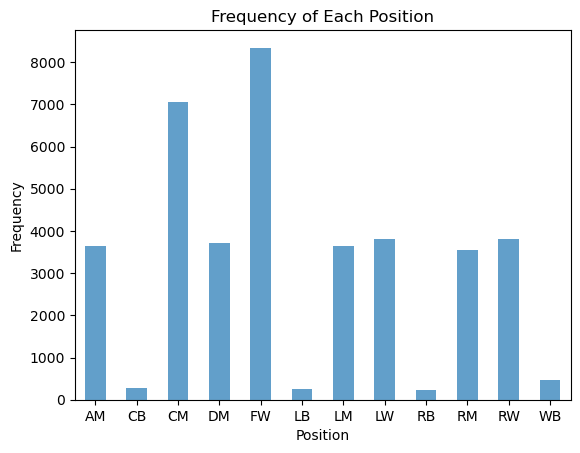

In [58]:
#these are the columns in att_explore that represent the positions that a given observation played in that game 
position_col = ['AM', 'CB', 'CM', 'DM', 'FW', 'LB', 'LM', 'LW', 'RB', 'RM', 'RW', 'WB']

position_count = att_explore[position_col].sum()

fig, ax = plt.subplots()

position_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Position')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Each Position')
plt.xticks(rotation = 0)
plt.show()

Initial observations are there are very few players with positions listed as CB, LB, RB or WB. This makes a lot of sense, because we are currently only working with the attackers data. It wouldn't make much sense if there were comparable amounts of observations with these positions listed, compared to actual attacking positions such as FW. In contrast, the most frequent position was FW, which also makes sense. Let's now take a look at how the proportion of goals scored differs across each position. 

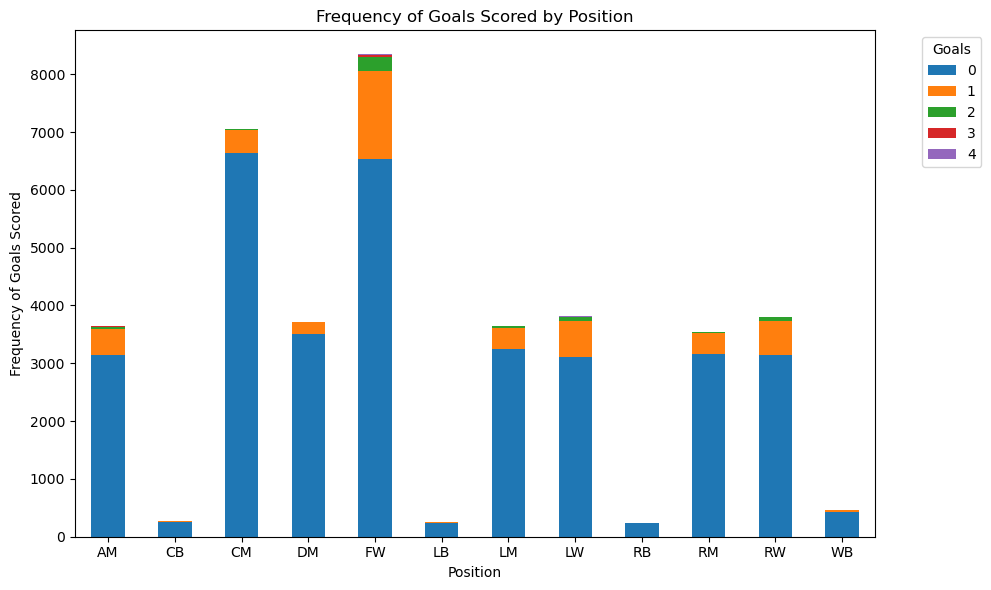

In [59]:
# Initialize a dictionary to store frequency of goal counts by position
goal_counts_by_position = {position: {} for position in position_col}  # Exclude 'Goals'

# Loop through each position column
for position in position_col:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_by_position[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_bypos_df = pd.DataFrame(goal_counts_by_position).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_bypos_df = goal_counts_bypos_df.T

# Plotting
goal_counts_bypos_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Position')
plt.ylabel('Frequency of Goals Scored')
plt.title('Frequency of Goals Scored by Position')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Goals', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

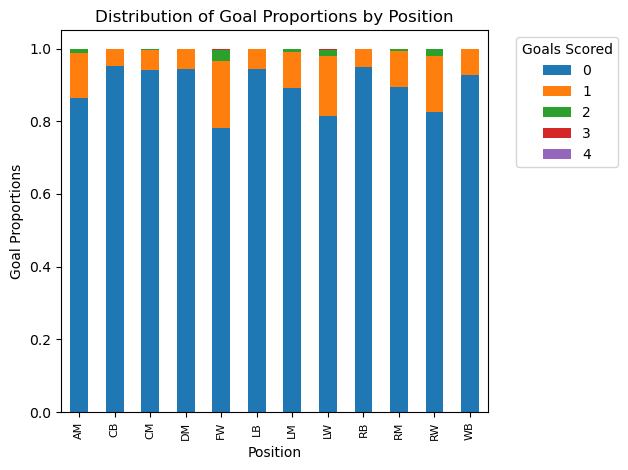

In [60]:
goalprop_by_position = goal_counts_bypos_df.div(goal_counts_bypos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_position.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

It is interesting that the proportion of goals scored seems to be quite even for CB, CM, DM, LB, RB and WB. Although it was expected that the proportion of goals scored when the listed position is CB, LB, RB and WB should be low, it was unexpected that the proportion of goals is also so low for both DM's and CM's. It is also not unexpected to see that the proportion of goals scored is highest for FW, followed by RW/LW, then AM, then RM/LM. We can now try to group certain positions together to see whether similar behaviours are exhibited. 

* RB, LB, CB, WB - Defenders
* DM, CM - Midfielders
* LM, RM - Wide Midfielders 
* AM - Attacking Midfielders
* LW, RW - Wide Forwards 

In [61]:
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB', 'WB']].any(axis = 1).astype(int)
print(att_explore['Defenders'])

10000    0
24977    0
37756    0
18759    0
168      0
        ..
31381    0
5199     0
8243     1
8823     0
25620    1
Name: Defenders, Length: 31737, dtype: int64


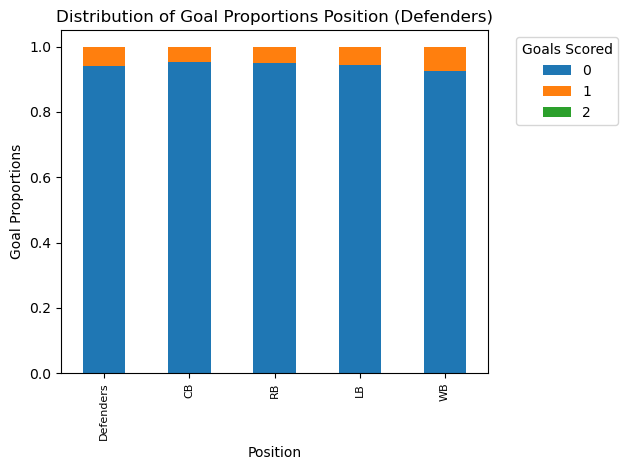

In [62]:
position_def = ['Defenders', 'CB', 'RB', 'LB', 'WB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the plot above, it appears that having WB as a position makes it more likely that a goal is scored, compared to playing as a CB/LB/RB. We can try to instead include only CB, RB and LB into the 'Defenders' category. Based on contextual information, this does make a bit more sense. WB's are typically used in 3 at the back formations, where they function as defenders out of possession, but are almost wingers in possession as they get high and wide on the pitch to provide the width. This is in comparison to typical CB/RB/LB's who are defenders both in and out of possession, and will rarely venture forward in the attack. 

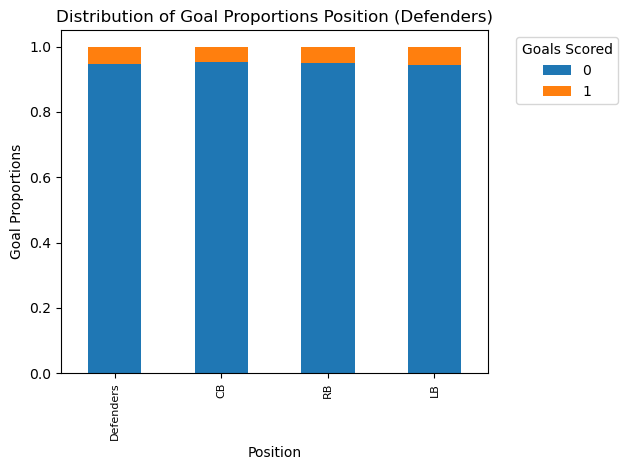

In [63]:
#we modify the 'Defenders' column to only include 'RB', 'LB' and 'CB'
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB']].any(axis = 1).astype(int)

position_def = ['Defenders', 'CB', 'RB', 'LB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see this time that the proportion of goals scored by Defenders (either CB, LB or RB) is closer to the proportion of goals scored when looking at the specific defensive positions. We can now move on to looking at midfielders. 

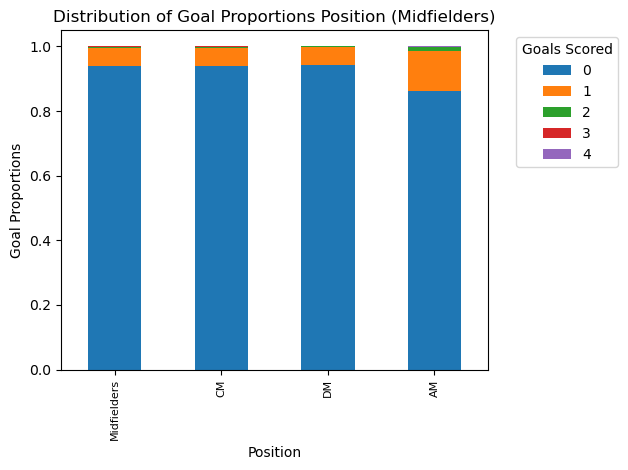

In [115]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Midfielders'] = att_explore[['CM', 'DM']].any(axis = 1).astype(int)

position_mid = ['Midfielders', 'CM', 'DM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_mid = {position: {} for position in position_mid}  # Exclude 'Goals'

# Loop through each position column
for position in position_mid:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_mid[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_mid_df = pd.DataFrame(goal_counts_mid).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_mid_df = goal_counts_mid_df.T

goalprop_mid = goal_counts_mid_df.div(goal_counts_mid_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_mid.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

As expected, the proportion of goals scored in the Midfielders category is similar to the proportion when looking at CM and DM positions individually. Therefore, it makes sense to combine these two categories. We can also see that attacking midfielders AM seem to score a lot more goals than either CM's or DM's, so it wouldn't make sense to include AM's into the Midfielders category. We now move onto Wide Midfielders.

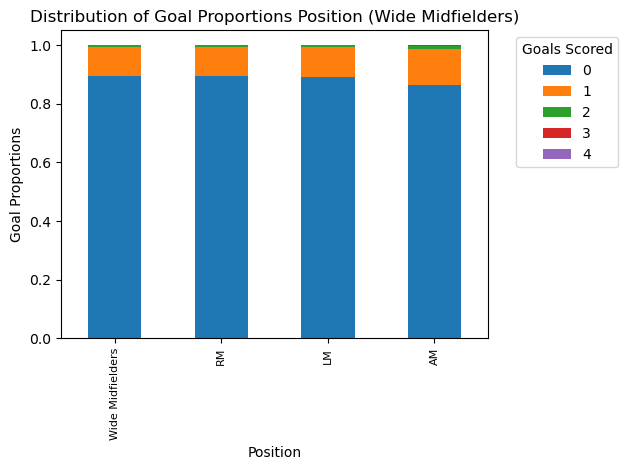

In [114]:
#we group CM and DM into one category called ' Wide Midfielders'
att_explore['Wide Midfielders'] = att_explore[['RM', 'LM']].any(axis = 1).astype(int)

position_wm = ['Wide Midfielders', 'RM', 'LM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wm = {position: {} for position in position_wm}  # Exclude 'Goals'

# Loop through each position column
for position in position_wm:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wm[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wm_df = pd.DataFrame(goal_counts_wm).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wm_df = goal_counts_wm_df.T

goalprop_wm = goal_counts_wm_df.div(goal_counts_wm_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wm.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wide Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Again, similar result where the plot shows that combining these two categories appears to make sense. We can also see that attacking midfielders seem to score more goals than wide midfielders, so it wouldn't make sense to include AM into this category. Finally, we will do the wingers/wide forwards. 

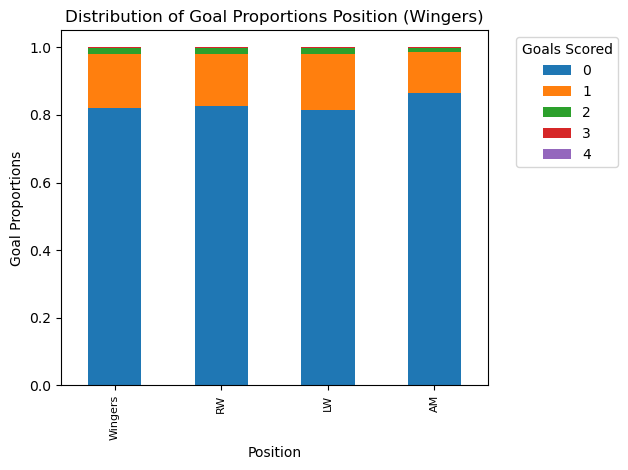

In [116]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Wingers'] = att_explore[['RW', 'LW']].any(axis = 1).astype(int)

position_wingers = ['Wingers', 'RW', 'LW', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wingers = {position: {} for position in position_wingers}  # Exclude 'Goals'

# Loop through each position column
for position in position_wingers:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wingers[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wingers_df = pd.DataFrame(goal_counts_wingers).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wingers_df = goal_counts_wingers_df.T

goalprop_wingers = goal_counts_wingers_df.div(goal_counts_wingers_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wingers.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wingers)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see that the proportion of goals scored when looking at RW and LW individually is very simila to the proportion of goals scored when combining these observations under one category 'Wingers'. Therefore, it makes sense to combine LW and RW together. We can also see that AM's seem to score less goals than wingers, so it wouldn't make sense to include it into the Wingers category. Overall, the AM category should be a standalone category. 

Let's now plot the combined categories together

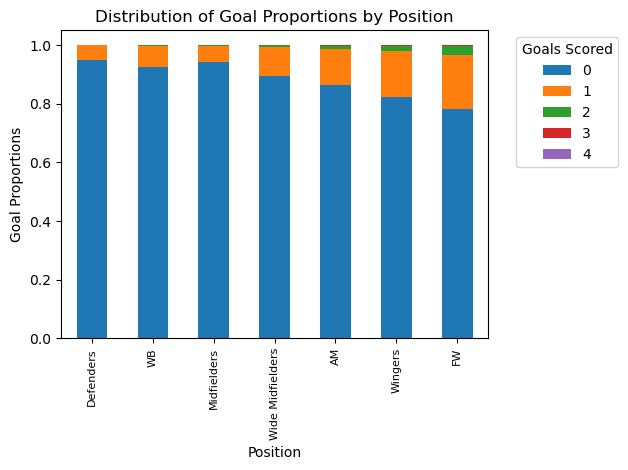

In [117]:
position_final = ['Defenders', 'WB', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_finalpos = {position: {} for position in position_final}  # Exclude 'Goals'

# Loop through each position column
for position in position_final:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_finalpos[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_finalpos_df = pd.DataFrame(goal_counts_finalpos).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_finalpos_df = goal_counts_finalpos_df.T

goalprop_finalpos = goal_counts_finalpos_df.div(goal_counts_finalpos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_finalpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the summarised positions, we can clearly see that the proportion of goals scored is lowest for Defenders, followed closely by Midfielders. Perhaps surprisingly, the proportion of goals scored by WB's is higher than Midfielders, which is then followed by Wide Midfielders. As Wingers and Forwards play furthest up the pitch, it makes sense that the proportion of goals scored is highest for these two positions. To summarise, the hypothesised method of combining positions makes sense, based on the exploratory analysis. 

### 'Minutes Played' Feature Exploration

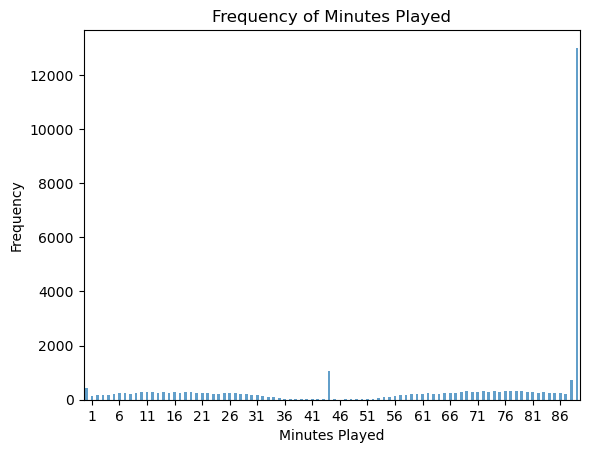

In [68]:
mins_count = att_explore['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is that majority of the observations in the data set played the full 90 minutes of the game. It may be a little difficult to see the behaviour of the other 'Minutes Played' due to how long the bar for 'Minutes Played' = 90 is. We can exclude this bar from the plot to better visualise the frequency of 'Minutes Played'. 

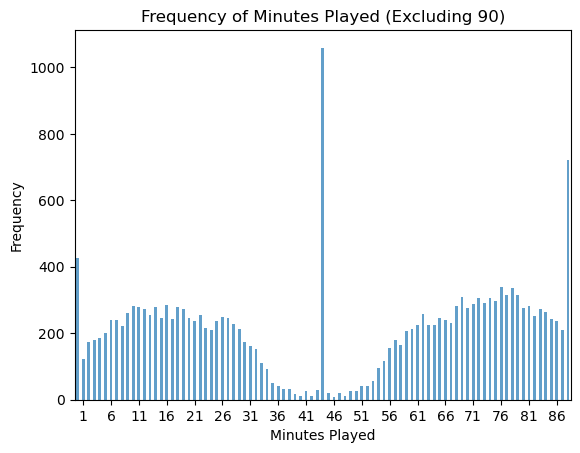

In [69]:
mins_count = mins_count.iloc[:-1]
fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (Excluding 90)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 89, 5))
ax.set_xticklabels(range(1, 89, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is some sort of symmetry between the left hand side of the plot and the right hand side of the plot. The most frequent minutes played excluding 90 minutes is 44/45 minutes, which refers to the observations that either played the first half and got subbed, or got subbed on the play the second half. The symmetry has to do with the fact that for each player being subbed off, there is another being subbed on. For example, if a observation played 70 minutes and got subbed off, then another observation would be subbed on to play 20 minutes. Based on this, we can see that the most frequent substitutions are approximately between the 68 to 78 minute mark. Subsitutions are quite rare between 46 and 56. Based on this, we can perhaps classify 'Minutes Played' as either:

1. 90 Minutes - Full Match Played
2. 46-89 Minutes - Substituted Off
3. 1-44 Minutes - Substituted On

However prior to this, we should first plot the raw 'Minutes Played' data against 'Goals Scored' to visualise the relationship. Since 'Minutes Played' is essentially a continuous variable (it isn't actually, but we can treat it as such), it wouldn't be wise to visualise the relationship between this feature and the target variable in the same way that we have done for the previous features. Instead, we can start by constructing a box plot. This should allow us to identify the distribution of Minutes Played for each category of Goals. 

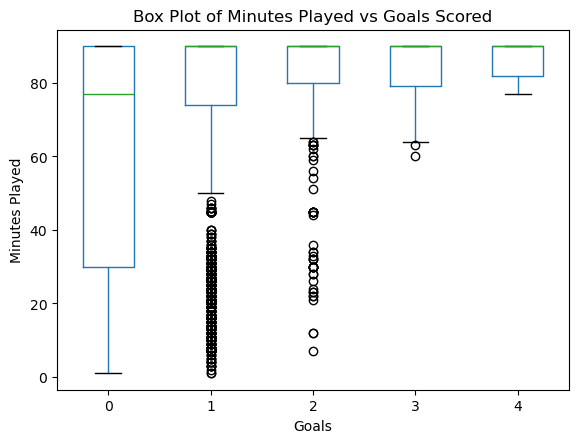

In [70]:
plt.figure
att_explore.boxplot(column = 'Minutes Played', by = 'Goals', grid = False)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

What we can immediately identify is that the median minutes played is 90 (i.e. the player both started and finished the game) for all observations that contained at least 1 goal scored. We can also see that although the lower extreme for 1 goal scored is at approximately 50 minutes, there are quite a few observations where the minutes played is less than 50, but the player still managed to score a goal. A similar phenomenon can be seen for observations where 2 goals were scored, albeit less frequently. What may be useful is to separate the observations that played 90 minutes, and those that didn't. In other words, we can have a look at whether or not the behaviour of goals scored differs for players that played the whole game, and players that were either substituted on or off during the game. 

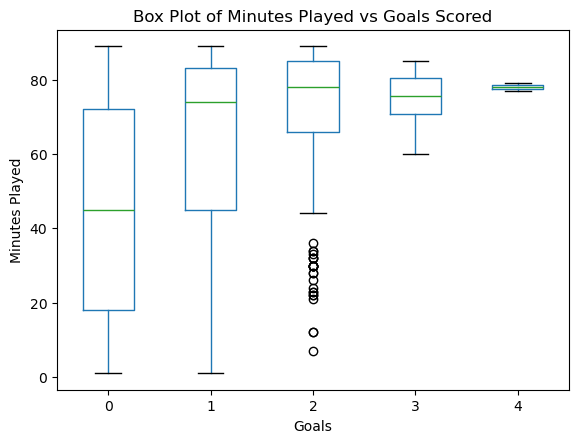

In [71]:
#new dataframe that excludes all observations where 'Minutes Played' == 90
subs_df = att_explore[att_explore['Minutes Played'] != 90]
subs_df = subs_df[['Minutes Played', 'Goals', 'Start']]

plt.figure
subs_df.boxplot(column = 'Minutes Played', by = 'Goals', grid = False)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

This plot makes it clear that of the players that did not play 90 minutes, the ones who scored at least one goal generally played more than 70 minutes. Although there are still some outliers, particularly in the observations that scored 2 goals, there appears to be sufficient justification that more minutes leads to a greater probability of scoring a goal. 

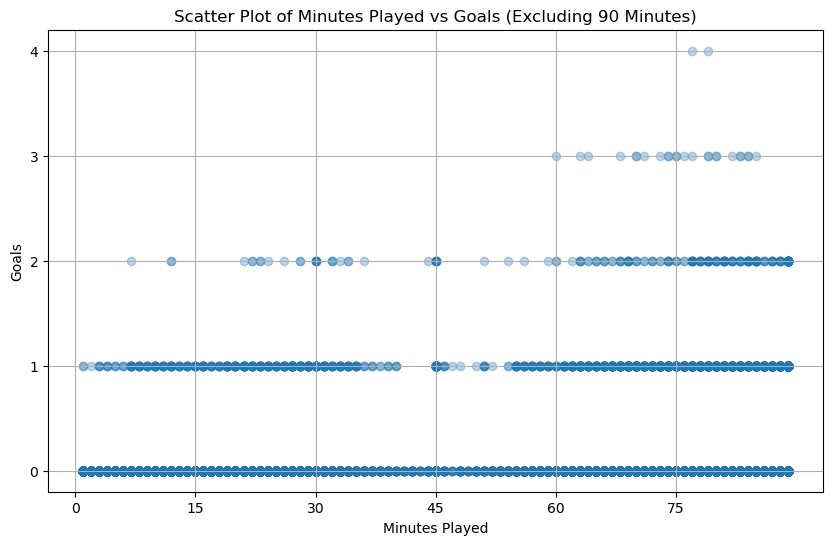

In [72]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()
plt.show()

This scatter plot is interesting for a few reasons. Firstly, we can see that there is quite an even distribution of observations that did not score any goals in terms of minutes played. However for the observations that scored 1 goal, there appears to be quite a bit more observations that played less than 45 minutes (i.e. they were subbed on) than perhaps expected. We can see this even more clearly if we reproduce the same plot, but change the colour of the observations that did not start the game (if they did not start but still played, this means that they were subbed on). 

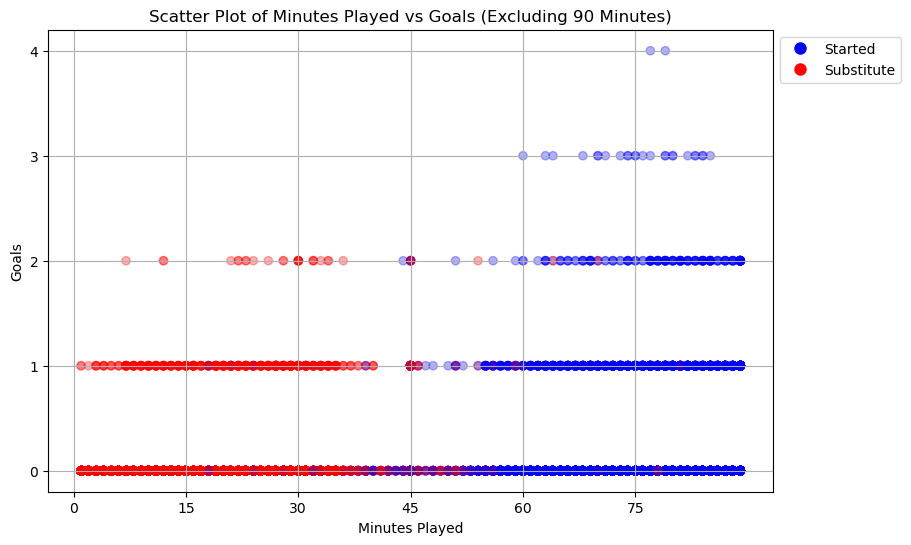

In [73]:
# Scatter plot - Colour coded based on 'Start'

subs_col = subs_df['Start'].map({'Y': 'blue', 'Y*': 'blue', 'N': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3, c = subs_col)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Started', 
                            markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Substitute', 
                            markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor = (1,1))
plt.subplots_adjust(right = 0.85)
plt.show()

This plot makes clear that it is much more likely that a given observation scores 2 or more goals if they started the game compared to if they were subbed on. This information was perhaps already made obvious when looking at the relationship between the 'Starts' feature and 'Goals'. However, it is interesting that there appears to be quite an even spread of observations which scored one goal, in terms of whether or not they started the game or not, as well as the number of minutes they played. We can make another plot to further investigate this. 

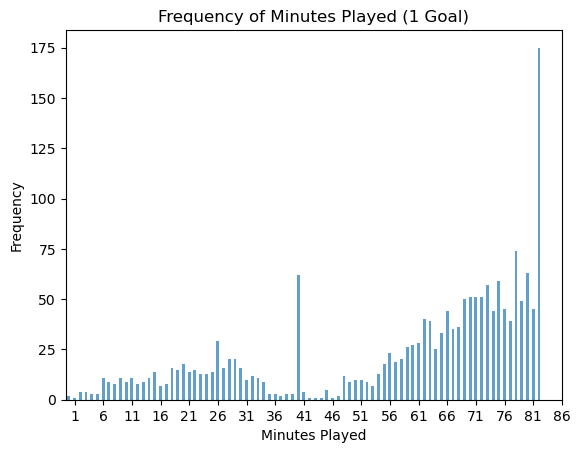

In [74]:
#we are further reducing the dataframe to only include observations that scored one goal
subs_df = subs_df[subs_df['Goals'] == 1]

mins_count_1goal = subs_df['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count_1goal.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (1 Goal)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

This plot does make it more clear that it is more likely for players that scored 1 goal to play more than 45 minutes, compared to the likelihood that they played less than 45 minutes. This was not particularly noticeable when looking at the scatter plot, which is why the bar plot was used to further investigate. In general, there is some uncertainty regarding whether or not the 'Minutes Played' feature and the 'Starts' feature are actually communicating the same information. 

### Assists Feature Exploration

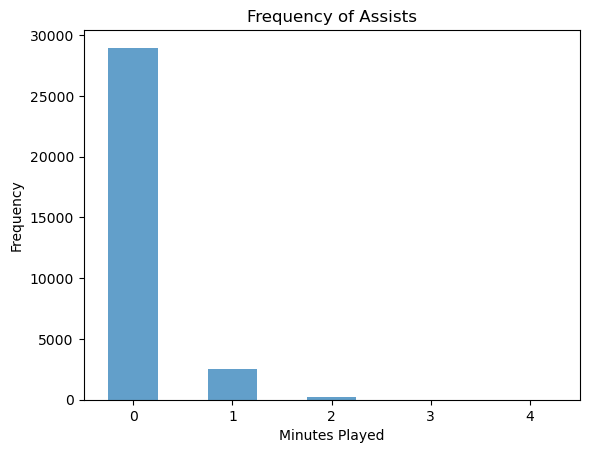

In [75]:
assists_count = att_explore['Assists'].value_counts().sort_index()

fig, ax = plt.subplots()

assists_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Assists')

plt.xticks(rotation = 0)
plt.show()

Majority of the observations have no assists. The next most frequent is 1 assist, followed by two assists. We now have a look at the relationship between 'Assists' and 'Goals'. 

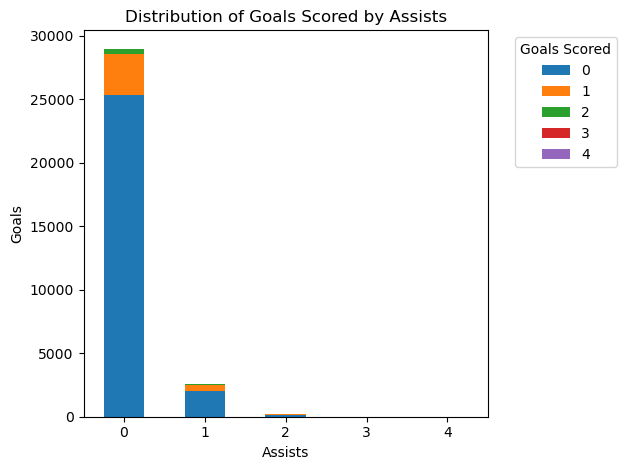

In [76]:
goals_by_assists = att_explore.groupby(['Assists', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Assists')
ax.set_xlabel('Assists')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

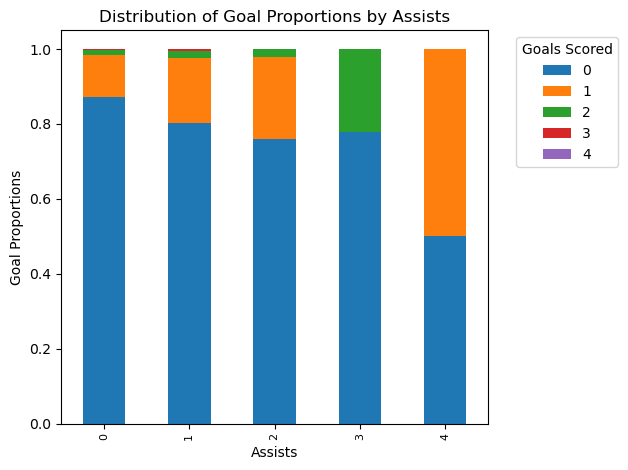

In [77]:
goalprop_by_assists = goals_by_assists.div(goals_by_assists.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Assists')
ax.set_xlabel('Assists')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

First off, it is almost remarkable that 50% of observations with 4 assists have also scored in the same game. This is most likely due to there being very few observations with 4 assists. We can show this below. There are only two observations in the entire dataset that have 4 assists. One of those observations also recorded a goal in the same game, thus leading to what could be seen in the plot above. What is perhaps even more remarkable is that this observation was recorded as playing in a WB position!

In [78]:
att_explore[att_explore['Assists'] == 4]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,LM,LW,RB,RM,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers
31293,Sat,1,Home,W 5–1,Manchester Utd,Leeds United,Y,LW,74,0,...,0,1,0,0,0,0,0,0,0,1
23586,Sat,11,Home,W 6–1,Manchester City,Bournemouth,Y,WB,90,1,...,0,0,0,0,0,1,0,0,0,0


Other than this, it can be seen that a larger number of assists corresponds to a greater proportion of goals being scored. The reason for this is unclear. Perhaps this has to do with the fact that attacking players are generally more likely to contribute both goals and assists? This was actually an unexpected discovery, as I would've previously hypothesised there to be no relationship between goals scored and assists. However, one major reason to be skeptical of these plots is the fact that there are very few observations that have either 2 or 3 assists. This can be seen below. 

In [79]:
att_explore[att_explore['Assists'] == 3]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,LM,LW,RB,RM,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers
6483,Sun,17,Home,W 3–0,West Ham,Wolves,Y,LW,85,0,...,0,1,0,0,0,0,0,0,0,1
5672,Sat,27,Home,W 5–1,Manchester City,Leicester City,Y,RM,90,0,...,0,0,0,1,0,0,0,0,1,0
2391,Wed,31,Home,W 3–1,Manchester City,Brighton,Y,LW,90,0,...,0,1,0,0,0,0,0,0,0,1
14862,Sat,25,Home,W 4–0,Liverpool,Southampton,Y,FW,90,0,...,0,0,0,0,0,0,0,0,0,0
14759,Sat,4,Home,W 9–0,Liverpool,Bournemouth,Y,FW,68,2,...,0,0,0,0,0,0,0,0,0,0
7049,Sun,27,Away,W 3–0,Arsenal,Fulham,Y,FW,76,0,...,0,0,0,0,0,0,0,0,0,0
27903,Mon,36,Away,W 3–0,Liverpool,Leicester City,Y,RW,87,0,...,0,0,0,0,1,0,0,0,0,1
9414,Sun,4,Home,W 7–2,Aston Villa,Liverpool,Y*,LW,90,2,...,0,1,0,0,0,0,0,0,0,1
5174,Wed,32,Away,W 4–1,Newcastle Utd,Bournemouth,Y,RW,61,0,...,0,0,0,0,1,0,0,0,0,1


In [80]:
att_explore[att_explore['Assists'] == 2]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,LM,LW,RB,RM,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers
10369,Tue,15,Away,W 4–1,Manchester City,Burnley,Y,"RW,LW",90,0,...,0,1,0,0,1,0,0,0,0,1
22149,Sun,4,Home,W 3–2,Crystal Palace,Wolves,N,FW,20,0,...,0,0,0,0,0,0,0,0,0,0
37343,Sat,33,Away,W 3–2,Manchester Utd,Manchester City,Y,LW,81,0,...,0,1,0,0,0,0,0,0,0,1
13288,Sat,36,Away,W 4–1,Newcastle Utd,Burnley,Y,RM,68,0,...,0,0,0,1,0,0,0,0,1,0
37794,Sun,6,Home,W 2–0,Arsenal,Everton,Y,AM,79,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31636,Sun,27,Home,W 4–1,Tottenham,Crystal Palace,Y,FW,79,2,...,0,0,0,0,0,0,0,0,0,0
35553,Sun,37,Home,W 3–0,Tottenham,Leicester City,Y,RW,76,0,...,0,0,0,0,1,0,0,0,0,1
1818,Sun,28,Home,W 5–0,Leicester City,Sheffield Utd,Y,FW,90,0,...,0,0,0,0,0,0,0,0,0,0
12637,Wed,33,Home,W 4–1,Manchester City,Arsenal,Y,FW,90,1,...,0,0,0,0,0,0,0,0,0,0


So there are 9 observations that have 3 assists in one game, and 195 observations that have 2 assists in one game. These are very small numbers when compared to the total number of observations, so we should take these insights with a degree of caution. 

### 'Penalties' Feature Exploration

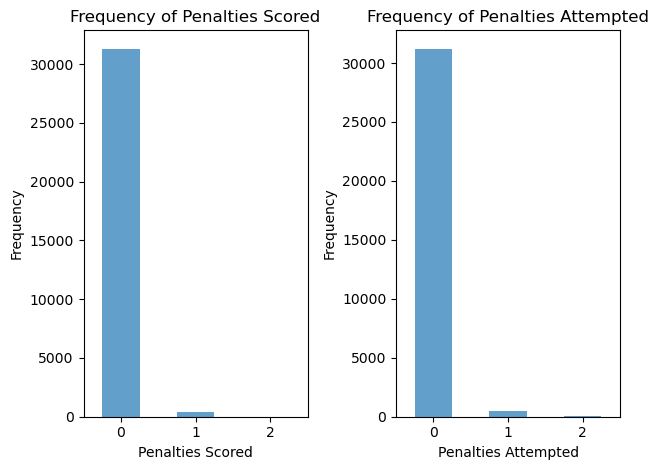

In [81]:
penscored_count = att_explore['Penalties Scored'].value_counts().sort_index()
penattempt_count = att_explore['Penalties Attempted'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

penscored_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Penalties Scored')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Penalties Scored')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

penattempt_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Penalties Attempted')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Penalties Attempted')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

So majority of the observations have no penalties scored, there are very few with 1 penalty scored, and almost no observations with 2 penalties scored. This pattern is repeated for penalties attempted, although there appears to be more observations with 2 penalty attempts. Looking at the below, we can see that out of all observations, there were only 504 that had 1 penalty attempted and 22 with 2 penalties attempted. In other words, only 1.6% of the observations had any penalties attempted. 

In [82]:
att_explore['Penalties Attempted'].value_counts()

Penalties Attempted
0    31211
1      504
2       22
Name: count, dtype: int64

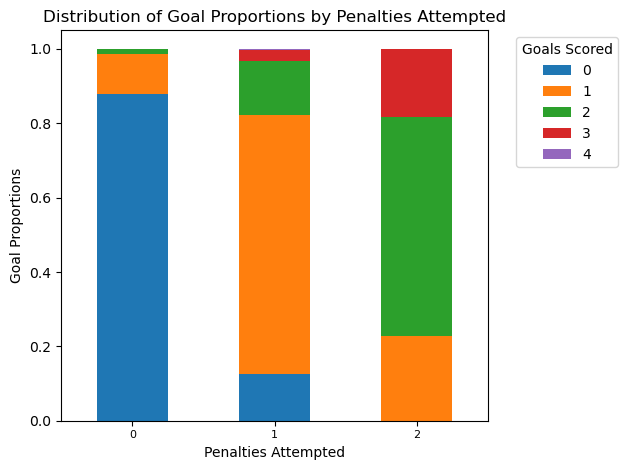

In [83]:
goals_by_penattempt = att_explore.groupby(['Penalties Attempted', 'Goals']).size().unstack(fill_value = 0)

goalprop_by_penattempt = goals_by_penattempt.div(goals_by_penattempt.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_penattempt.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Penalties Attempted')
ax.set_xlabel('Penalties Attempted')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Just over 80% of the observations that have 1 penalty attempted recorded a goal. This makes sense since a penalty represents a really big chance to score goal. It is also interesting to note that all observations with 2 penalties attempted in one game recorded at minimum 1 goal. Based on this information, we can say that knowing that a penalty was attempted by a particular player in a particular game means they are very likely to have scored a goal. Next, we have a look at the proportion of 'Penalties Attempted' that actually resulted in a 'Penalty Scored'. 

In [84]:
def penprop (row):
    if row['Penalties Attempted'] == 0:
        return np.nan
    return row['Penalties Scored']/row['Penalties Attempted']

att_explore['Penalty Success Rate'] = att_explore.apply(penprop, axis = 1)
att_explore['Penalty Success Rate']

10000   NaN
24977   NaN
37756   NaN
18759   NaN
168     NaN
         ..
31381   NaN
5199    NaN
8243    NaN
8823    NaN
25620   NaN
Name: Penalty Success Rate, Length: 31737, dtype: float64

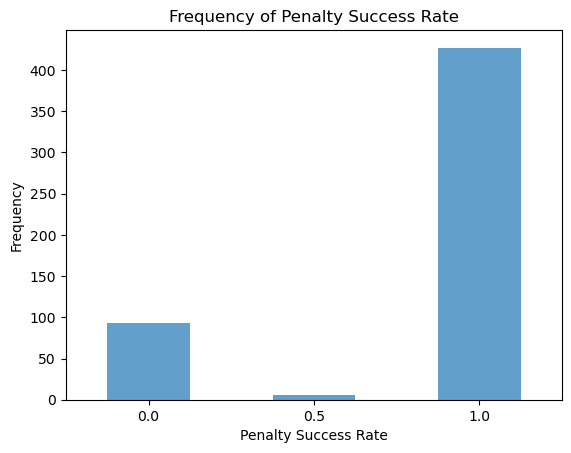

Penalty Success Rate
0.0     93
0.5      6
1.0    427
Name: count, dtype: int64

In [85]:
pensuccess_count = att_explore['Penalty Success Rate'].value_counts().sort_index()

fig, ax = plt.subplots()

pensuccess_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Penalty Success Rate')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Penalty Success Rate')

plt.xticks(rotation = 0)
plt.show()

pensuccess_count

There were a total of 526 observations that contained penalty activity (either 1 of 2 penalties attempted). 81.1% of these observations had a 100% success rate. 17.7% had a 0% success rate. Only 1.1% of them had a 50% success rate (the small number is because there needs to be 2 penalties attempted to obtain a 50% success rate. As there were very few observations with 2 penalty attempts in the first place, the number of observations with a 50% success rate from the penalty spot would be quite small.). There are a few takeaways from this. The first is that penalty success is generally quite high. In other words, if there is a penalty, we can be pretty confident that the player taking the penalty will score. The second takeaway is that penalties are quite rare events. Therefore, including penalty success rate as a feature doesn't really give us much additional information compared to the 'Penalties Attempted' feature. 

### Shots Feature Exploration

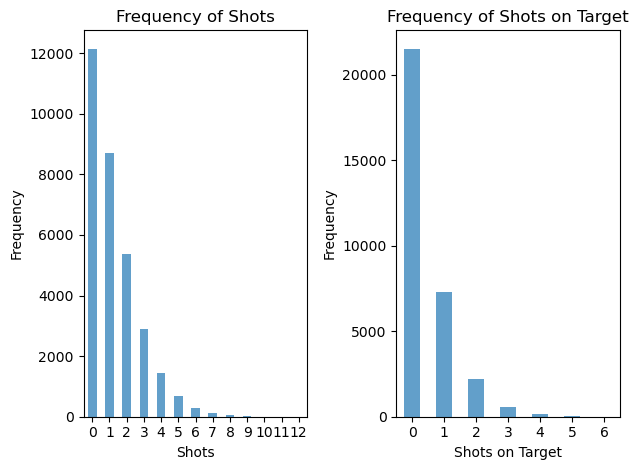

In [86]:
shots_count = att_explore['Shots'].value_counts().sort_index()
sot_count = att_explore['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The general trend is that majority of observations have both 0 shots and shots on target. This makes sense, because the dataset contains quite a few observations that are defensive/midfield players, who will generally not be shooting much throughout the game. On this basis, we can have a look to see how this plot changes if we just include attackers. 

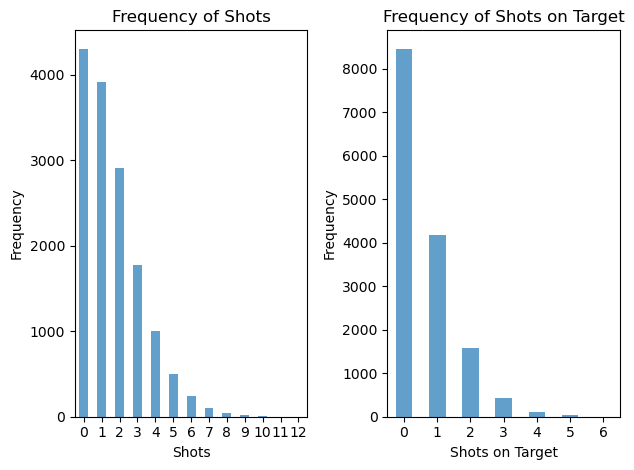

In [87]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_shots_df = att_explore[attackers_condition][['Shots', 'Shots on Target', 'Goals']]

shots_count = attackers_shots_df['Shots'].value_counts().sort_index()
sot_count = attackers_shots_df['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

It is interesting that the trend is broadly the same. We can see that the difference between the number of observations with no shots and the number of observations with 1 shots is now much closer, compared to the previous plot. This makes sense, as we expect more of the observations now to be taking shots (since we are only plotting the observations that played in the attacking positions). 

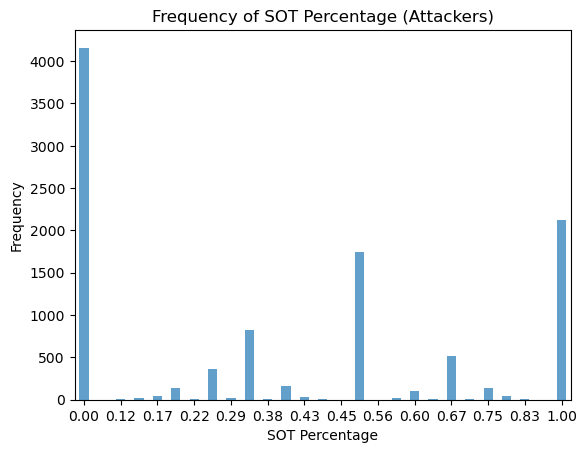

In [88]:
#creating new feature - shot on target percentage 
attackers_shots_df['SOT Percentage'] = attackers_shots_df['Shots on Target']/attackers_shots_df['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = attackers_shots_df['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage (Attackers)')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

So there is no clear pattern when looking at the frequency of shots on target percentages. The large number of observations with 0% shots on target percentage mostly consist of the observations that had 0 shots in the game. There is also a suprisingly large number of observations that had 100% shot on target percentage. I speculate majority of those consist of observations that had 1 shot and 1 shot on target. We can really quickly compare the plot above, to a similar plot but this time including data from all other positions as well. 

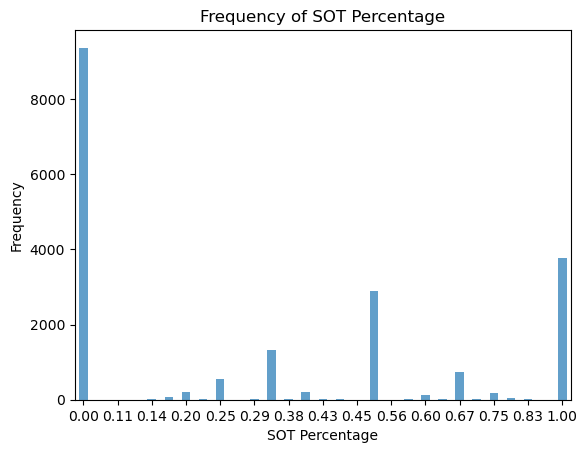

In [89]:
#creating new feature - shot on target percentage 
att_explore['SOT Percentage'] = att_explore['Shots on Target']/att_explore['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = att_explore['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

There is actually quite a similar pattern, which is slightly surprising. I would've expected there to be more observations with a reduced shot on target percentage, by virtue of the fact that including midfielders/defenders in the plot would lead to an on average worse shooting ability, so more observations with lower shot on target percentages. However, the other way to look at it would be that a lot of those observations wouldn't have taken shots anyway, so the overarching pattern stays somewhat similar. The current plots show that there are quite a few varying values for 'SOT Percentage'. Perhaps we could look into grouping them?

One final thing I also want to take a look at is how the SOT Percentage differs across the number of shots taken in a game. We will have to plot the proportion of observations per SOT Percentage, since there are so many SOT Percentage values that have very few observations. 

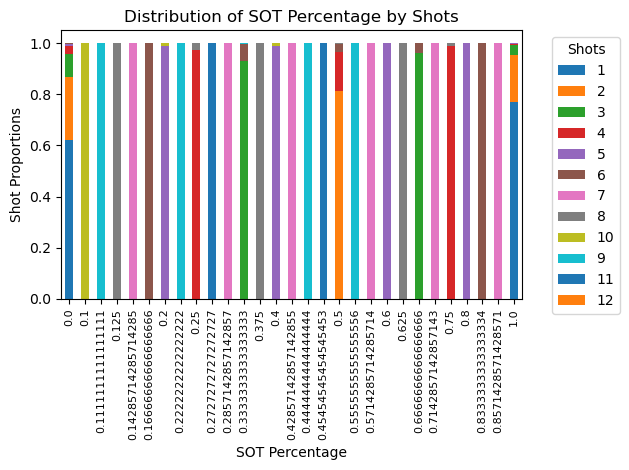

In [90]:
sotpct_by_shots = att_explore.groupby(['SOT Percentage', 'Shots']).size().unstack(fill_value = 0)
sotpctprop_by_shots = sotpct_by_shots.div(sotpct_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


Very messy plot! We can see that there are quite a few of the bars that only have one colour. For example, the 0.1 bar (10% shot on target percentage) is only from observations with 10 shots in one game. We can probably remove them from the plot for better interpretability. 

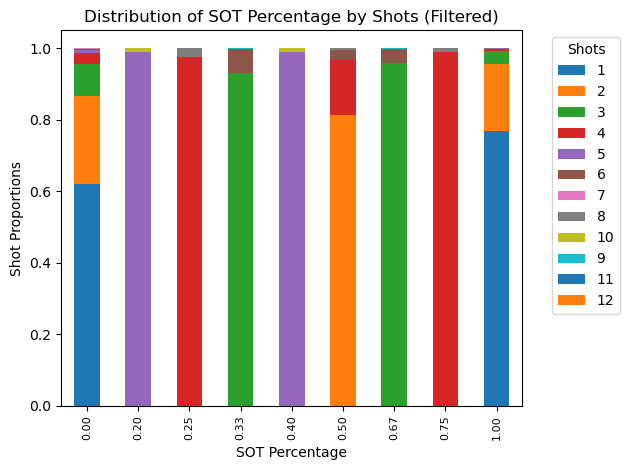

In [91]:
#modifying sotpctprop_by_shots to only include SOT Percentages with multiple shot values 
sotpctprop_by_shots = sotpctprop_by_shots.loc[~(sotpctprop_by_shots.isin([1]).any(axis = 1))]

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots (Filtered)')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

ax.set_xticks(range(len(sotpctprop_by_shots.index)))
ax.set_xticklabels([f'{value:.2f}' for value in sotpctprop_by_shots.index])
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

The plot is still quite messy, but is slightly more interpretable now. Firstly, over half of the observations with 0% SOT Percentage are attributed to observations that only had 1 shot in the game. The next most frequent is 2 shots, followed by 3 shots and so on. We can also see that a lot of the other SOT percentage are down to certain number of shots. For example, a 20% SOT Percentage is only possible with either 5 shots and 1 SOT or 10 shots and 2 SOT. Finally, we can see that just under 80% of the observations with 100% SOT Percentage are down to observations with 1 shot. A potential takeaway from this is that it is difficult to achieve 100% SOT percentage. Let's now take a look at the relationship between Shots, Shots on Target, SOT Percentage and Goals. 

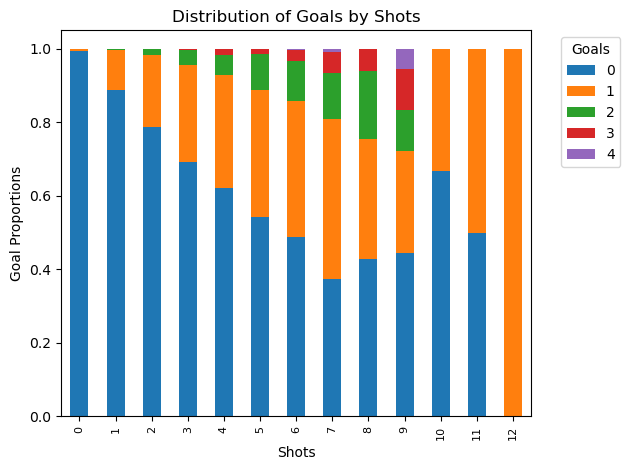

In [92]:
goals_by_shots = att_explore.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_shots = goals_by_shots.div(goals_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots')
ax.set_xlabel('Shots')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


First off, it appears that there is a steady trend of increasing goal proportions as shots increase all the way up to 7 shots. Then, the trend seems to reverse and become unstable. This is probably due to the fact that there are limited number of observations with 8+ shots per game. The proportion of 2 or more goals also increases similarly. The fact that there are no observations that have 2 or more goals and 10 or more shots at the same time is probably down to the limited number of observations that had 10 or more shots per game. There also seems to be some observations that had 0 shots but still managed a goal. We need to have a quick look at those observations, as there may be an issue there. 

In [93]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0)]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,RB,RM,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage
31700,Sat,29,Home,D 1–1,Tottenham,Arsenal,Y,FW,90,1,...,0,0,0,0,0,0,0,0,1.0,NaN
17043,Sat,1,Away,W 3–0,Chelsea,Huddersfield,Y,CM,90,1,...,0,0,0,0,0,1,0,0,1.0,NaN
10698,Sat,18,Away,W 3–0,West Ham,Stoke City,Y*,CM,34,1,...,0,0,0,0,0,1,0,0,1.0,NaN
10624,Sat,3,Away,W 3–1,West Ham,Watford,Y*,"DM,CM",90,1,...,0,0,0,0,0,1,0,0,1.0,NaN
24559,Sat,22,Away,W 2–1,Southampton,Leicester City,Y,"CM,DM,WB",90,1,...,0,0,0,1,0,1,0,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,Mon,13,Home,W 3–2,Fulham,Wolves,Y,LW,89,2,...,0,0,0,0,0,0,0,1,1.0,NaN
24383,Thu,22,Home,D 1–1,West Ham,Bournemouth,Y,AM,90,1,...,0,0,0,0,0,0,0,0,1.0,NaN
38706,Sat,18,Away,W 3–2,Crystal Palace,Manchester City,Y*,CM,90,1,...,0,0,0,0,0,1,0,0,1.0,NaN
33010,Sat,1,Away,W 5–0,Manchester City,West Ham,N,FW,22,1,...,0,0,0,0,0,0,0,0,1.0,NaN


A quick scan appears to show that a lot of these observations have a Penalty Success Rate of 1. Let's further filter out these observations to remove any that have Penalty Success Rate = 1. 

In [94]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0) & (att_explore['Penalty Success Rate'] != 1)]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,RB,RM,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage
20991,Sat,27,Home,D 1–1,Bournemouth,Wolves,Y,FW,90,1,...,0,0,0,0,0,0,0,0,0.5,NaN


So we now know that goals that result from penalties are not counted as either shots or shots on target. 

Let's now have a look at the relationship between Goals and Shots on Target. 

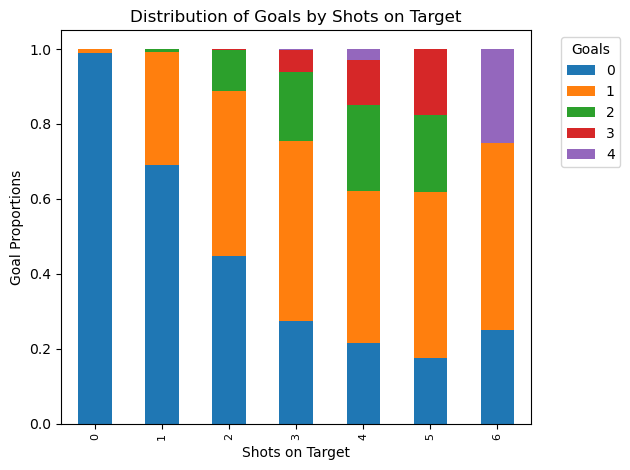

In [95]:
goals_by_sot = att_explore.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sot = goals_by_sot.div(goals_by_sot.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots on Target')
ax.set_xlabel('Shots on Target')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


A similar trend emerges, where the greater the number of shots on target, the greater the proportion of observations that have at least 1 goal. For example, for observations with 5 shots on target in 1 game, over 80% of them have scored at least one goal. Based on these graphs, you could argue that Shots on Target are a stronger predictor of goals than Shots, because Shots on Target are less messy. I would also like to reproduce these two graphs but only for attackers, just to see if the trend is different when eliminating more defensive players from the plot. 

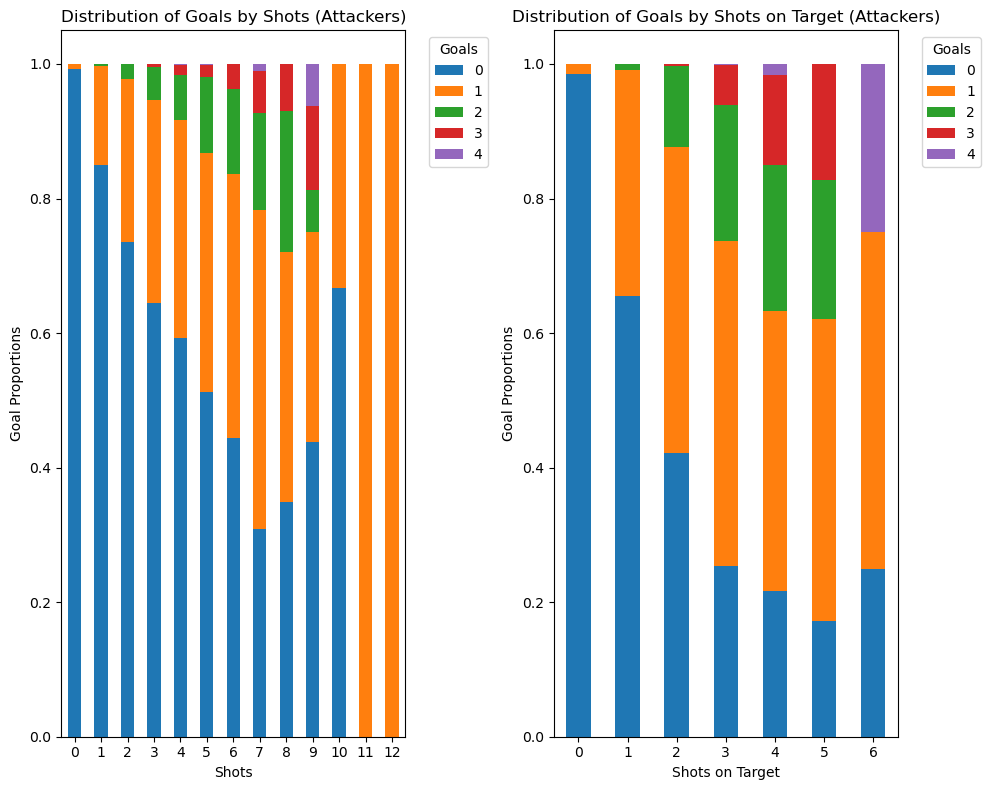

In [96]:
attackers_goals_by_shots = attackers_shots_df.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_shots = attackers_goals_by_shots.div(attackers_goals_by_shots.sum(axis = 1), axis = 0)

attackers_goals_by_sot = attackers_shots_df.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_sot = attackers_goals_by_sot.div(attackers_goals_by_sot.sum(axis = 1), axis = 0)

fig, axes = plt.subplots(1, 2, figsize = (10, 8))

attackers_goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Goal Proportions')
axes[0].set_title('Distribution of Goals by Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)
axes[0].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

attackers_goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Goal Proportions')
axes[1].set_title('Distribution of Goals by Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)
axes[1].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')


plt.tight_layout()
plt.show()

If you compare these plots with the above, you can see that the underlying trends are largely the same. Overall, larger number of shots and shots on target will lead to a greater proportion of the observations having scored at least one goal. It seems that the pattern is more stable for shots on target, where there is quite a consistent increase in the proportion of observations having at least one goal as the number of shots on target increases. Although this pattern is also largely there for shots, it gets a little unstable as the number of shots reaches 8+, as there are very few observations that have 8+ shots per game. 

### Yellow Card/Red Card Feature Exploration

Overall, we don't expect to see much correlation between the number of yellow cards/red cards and the number of goals scored. The only possible pattern is that larger number of cards = fewer goals scored, as it is usually more likely for more defensive players to pick up yellow cards. However, we don't expect this to be a strong relationship. We start by taking a look at how many of the observations have yellow/red cards. 

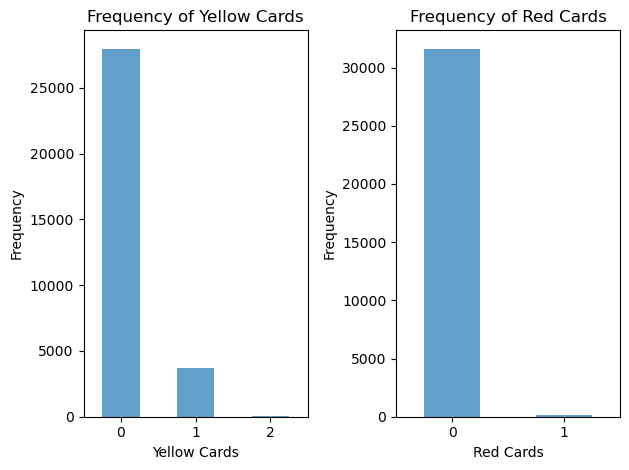

In [97]:
yc_count = att_explore['Yellow Cards'].value_counts().sort_index()
rc_count = att_explore['Red Cards'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

yc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Yellow Cards')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Yellow Cards')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

rc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Red Cards')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Red Cards')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We can see that majority of the observations have recorded neither a yellow or a red card throughout the game. There is a fair number of observations that have recorded 1 yellow card per game, but very few that have either picked up 2 yellow cards/1 red card. We now turn our attention to the relationship between YC/RC and Goals. 

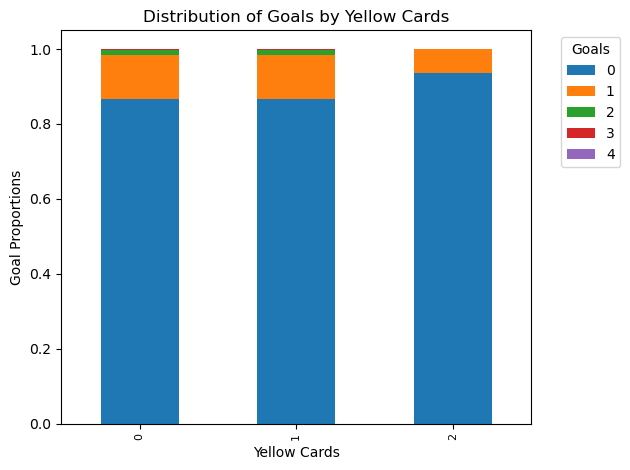

In [98]:
goals_by_yc = att_explore.groupby(['Yellow Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_yc = goals_by_yc.div(goals_by_yc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_yc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Yellow Cards')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that the proportion of observations that have at least 1 goal is pretty much the same when comparing observations with no yellow cards and observations with 1 yellow card. However, the proportion of observations with at least 1 goal is quite a bit smaller for observations with 2 yellow cards. This probably has to do with the fact that getting 2 yellow cards is equivalent to getting a red card, i.e you're sent off so you are playing less minutes in the game. We have seen previously that the more minutes you play corresponds to a greater proportion of observations scoring at least 1 goal, so this tracks. Based on this, we expect to see the proportion of observations that score at least 1 goal to be greater for observations with no red card, compared to those with a red card. 

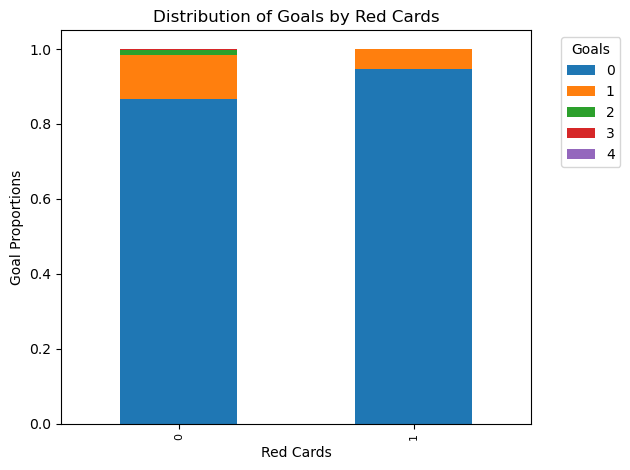

In [99]:
goals_by_rc = att_explore.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rc = goals_by_rc.div(goals_by_rc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


As expected, the proportion of observations that have at least 1 goal is smaller for the observations that have recorded a red card, compared to thoes that did not record a red card. Although the plots do suggest some relationship between Goals and Red/ 2 Yellow cards, I believe this is primarily to do with the effect of Red/2 Yellow Cards on minutes played, which is ultimately having an impact on goals scored. In other words, the fact that an observation recorded either 2 yellow cards/1 red card is already recorded in the 'Minutes Played' feature, in terms of it's effect on goals. 

To investigate this, we can have a look at the average minutes played of those players that recorded a red card. We can then plot the proportion of goals scored for observations with a red card, and compare this to the proportion of goals scored for observations with comparable minutes played, but no red card. 

In [100]:
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].mean()


Minutes Played    54.991304
dtype: float64

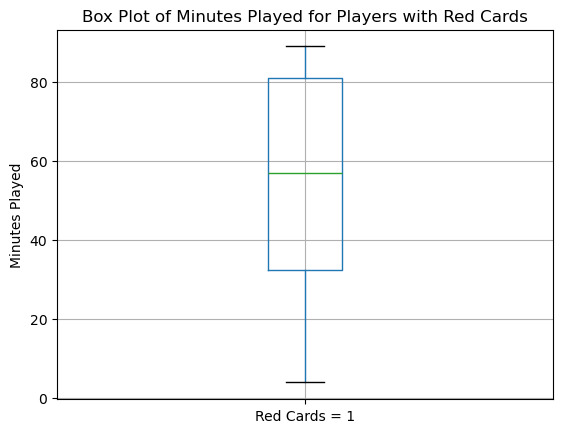

In [101]:
plt.figure()
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Box Plot of Minutes Played for Players with Red Cards')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])
plt.show()


So of the players who recorded a red card, the mean minutes played was 54.9, with a similar median. Perhaps surprisingly, the box plot shows that the range of minutes played for players with red cards is actually quite dispersed. Let's compare this with a box plot of minutes played for all of the observations. 

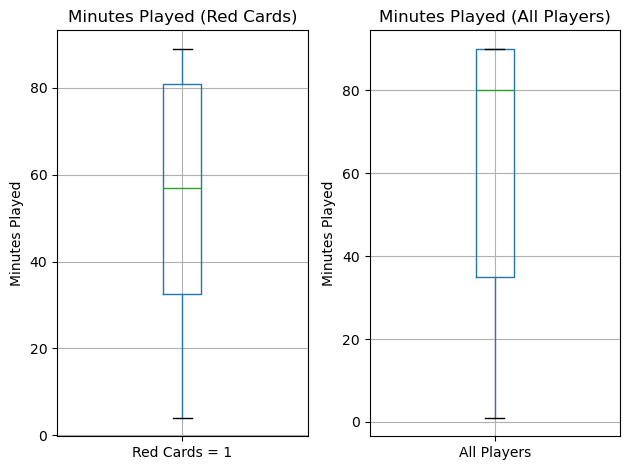

In [102]:
plt.figure()

plt.subplot(1, 2, 1)
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
att_explore[['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (All Players)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

So clearly, the minutes played when looking at all players has a much higher median than the minutes played for the players with red cards. However, the spread seems to be quite similar in terms of both the min/max as well as the interquartile range. 

In [103]:
np.random.seed(753)
#subset of red card observations
rc_dat = att_explore[att_explore['Red Cards'] == 1]

#subset of remaining observations 
norc_dat = att_explore[att_explore['Red Cards'] == 0]

#estimating the distribution of 'Minutes Played' in rc_dat
rc_dat_mins = rc_dat['Minutes Played']
bins = np.histogram_bin_edges(rc_dat_mins, bins = 'auto')

#sample from norc_dat based  on estimated distribution
samp_dat = pd.DataFrame()

for i in range(len(bins) - 1):
    #calculate range for current bin
    bin_range = (bins[i], bins[i + 1])
    
    #filter observations that fall intocurrent bin
    bin_data = norc_dat[
        (norc_dat['Minutes Played'] >= bin_range[0]) &
        (norc_dat['Minutes Played'] < bin_range[1])
    ]
    if not bin_data.empty:
        bin_sample_size = ((rc_dat_mins >= bin_range[0]) & 
                           (rc_dat_mins < bin_range[1])).sum()
        
        sampled_from_bin = bin_data.sample(n=min(bin_sample_size, len(bin_data)), replace=True)
        samp_dat = pd.concat([samp_dat, sampled_from_bin])

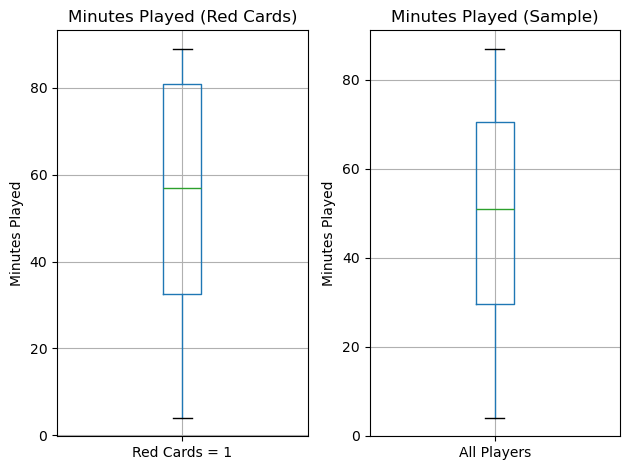

In [104]:
plt.figure()

plt.subplot(1, 2, 1)
rc_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
samp_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Sample)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

We can see that the distribution of 'Minutes Played' between the Red Card subset and the sample is relatively similar. Let's now plot compare the goal proportions between these two samples

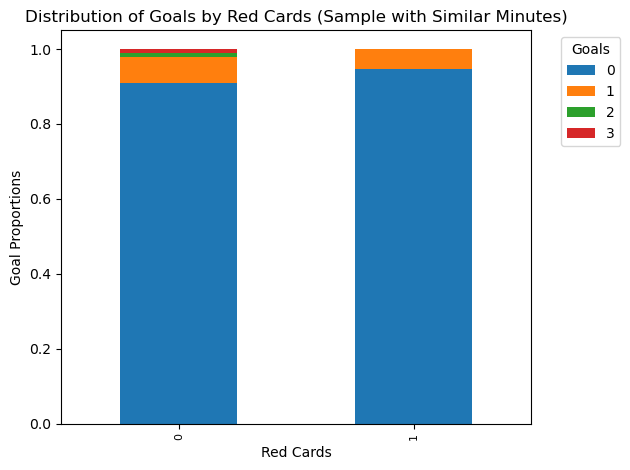

In [105]:
rcsample_dat = pd.concat([rc_dat, samp_dat], ignore_index = True)

goals_by_rcsamp = rcsample_dat.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rcsamp = goals_by_rcsamp.div(goals_by_rcsamp.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rcsamp.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards (Sample with Similar Minutes)')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that although there is still a difference in the proportion of goals scored by observations with red cards, compared to observations without red cards (sampled so that the distribution of minutes played is comparable to the subset of observations that have red cards), this difference is not as large as previously seen. 

### Touches Feature Exploration

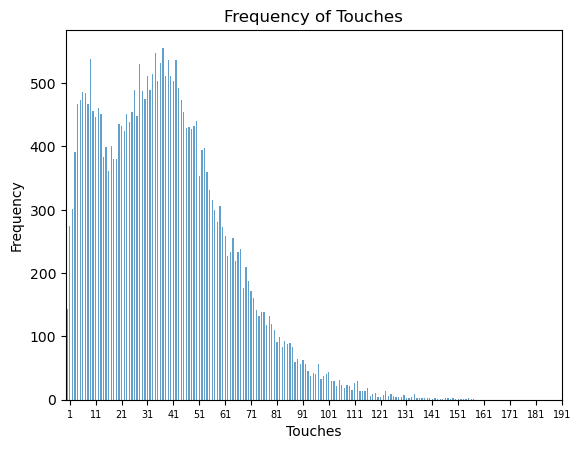

In [106]:
touches_count = att_explore['Touches'].value_counts().sort_index()

fig, ax = plt.subplots()

touches_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Touches')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Touches')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 200, 10))
ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Majority of the observations have 'Touches' value less than 100. We know that playing in certain positions is more likely to get you more touches (for example, you are more likely to have more touches playing in midfield and defence compared to attack). Also, you will obviously get more touches if you are playing more minutes. Let's investigate the second by inspecting a plot of 'Touches' against 'Minutes Played'. 

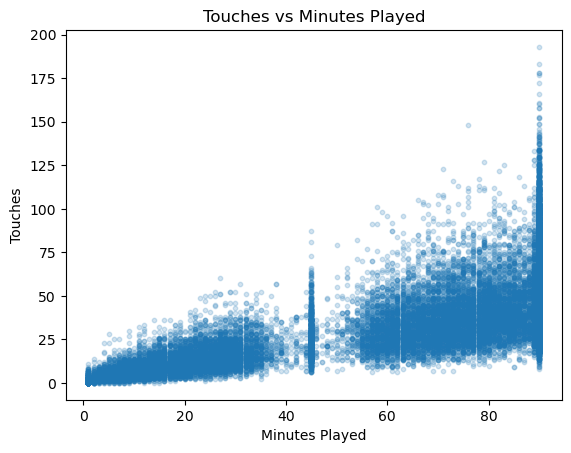

In [107]:
plt.figure()

plt.scatter(att_explore['Minutes Played'], att_explore['Touches'], alpha = 0.2, s = 10)
plt.title('Touches vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Touches')
plt.show()

We can clearly see the pattern of more minutes played = more touches. Suppose we then colour code each point in the scatter plot by the position played by the observation. 

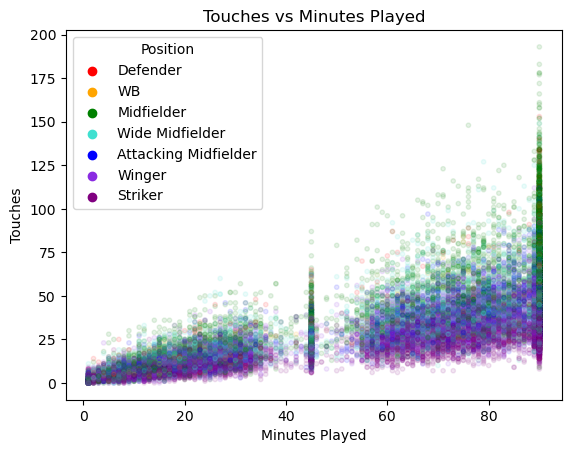

In [124]:
def get_position(row):
    if row['Defenders'] == 1:
        return 'Defender'
    if row['WB'] == 1:
        return 'WB'
    if row['Midfielders'] == 1:
        return 'Midfielder'
    if row['Wide Midfielders'] == 1:
        return 'Wide Midfielder'
    if row['Wingers'] == 1:
            return 'Winger'
    if row['AM'] == 1:
        return 'Attacking Midfielder'

    if row['FW'] == 1:
        return 'Striker'

#position plot contains the position played by each observation
position_plot = att_explore.apply(get_position, axis = 1)

position_colourmap = {
    'Defender': 'red',
    'WB': 'orange',
    'Midfielder': 'green', 
    'Wide Midfielder': 'turquoise',
    'Attacking Midfielder': 'blue',
    'Winger': 'blueviolet', 
    'Striker': 'purple'
}

position_colours = position_plot.map(position_colourmap)

plt.figure()

plt.scatter(att_explore['Minutes Played'], att_explore['Touches'], color = position_colours, alpha = 0.1, s = 10)
plt.title('Touches vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Touches')

#custom legend
for position, colour in position_colourmap.items():
    plt.scatter([], [], color = colour, label = position)
plt.legend(title = 'Position')



plt.show()

What we can see is that darker coloured points are located towards the bottom of the plot, whilst the more green coloured points are located towards the top. This confirms our initial guess that observations classified as playing in midfield are more likely to record more touches, whilst attackers such as wingers or strikers are more likely to record less touches. We need to keep this in mind as we investigate the relationship between 'Touches' and goals. 

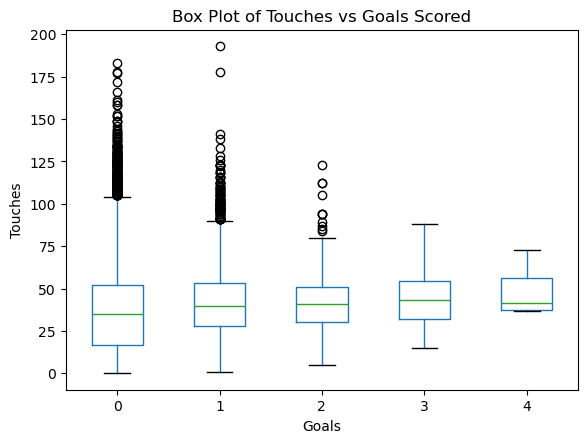

In [125]:
plt.figure
att_explore.boxplot(column = 'Touches', by = 'Goals', grid = False)
plt.title('Box Plot of Touches vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Based on the boxplot, it appears that the median number of touches for different 'Goals' values is relatively similar, at around 35. There do appear to be quite a few outliers however. Recall that we previously showed the effect of 'Position' on 'Touches'. Let's reproduce the box plot above, but using only the attackers data. 

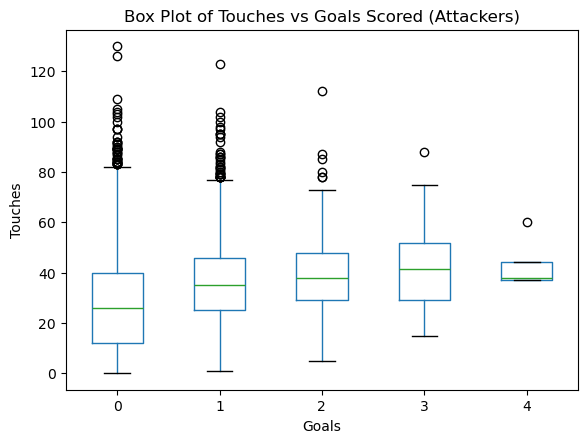

In [128]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_touches_df = att_explore[attackers_condition][['Touches', 'Goals']]

plt.figure
attackers_touches_df.boxplot(column = 'Touches', by = 'Goals', grid = False)
plt.title('Box Plot of Touches vs Goals Scored (Attackers)')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Now, it appears as if having more touches leads to more goals being scored. However, this relationship does not appear to be very strong, as we can see that the median number of touches for observations that scored at least 1 goal is the approximately the same, whether or not 1 goal is scored or 3 goals are scored. This sort of aligns with the contextual information. The number of touches that a player records in a game is largely dependent on the tactical system of the team that the player plays for, as well as the role of the player within this tactical system. For example, take two attackers; Harry Kane and Erling Haaland, both of which are prolific strikers. Harry Kane is considered to be more of a link player, meaning he will drop deep to link the midfield with the attack. This generally leads to him having more touches of the ball in comparison to Erling Haaland, who is more of a poacher. 

### Tackles, Interceptions and Blocks Feature Exploration

I have included these 3 features in the same section because these are 3 features typically considered to be associated with defensive players. We don't expect there to be any strong relationship between these features and goals scored. 

#### Tackles

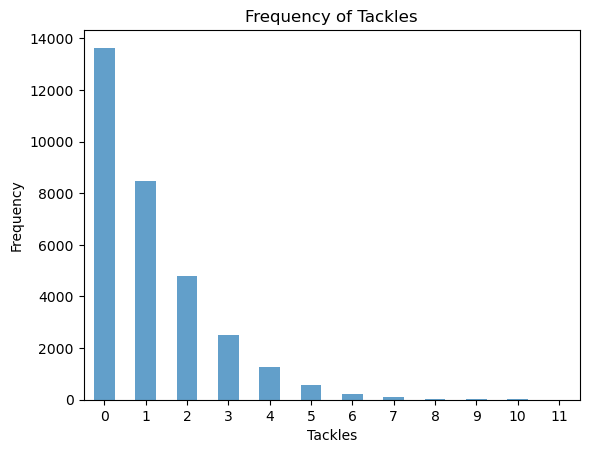

In [130]:
tackles_count = att_explore['Tackles'].value_counts().sort_index()

fig, ax = plt.subplots()

tackles_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

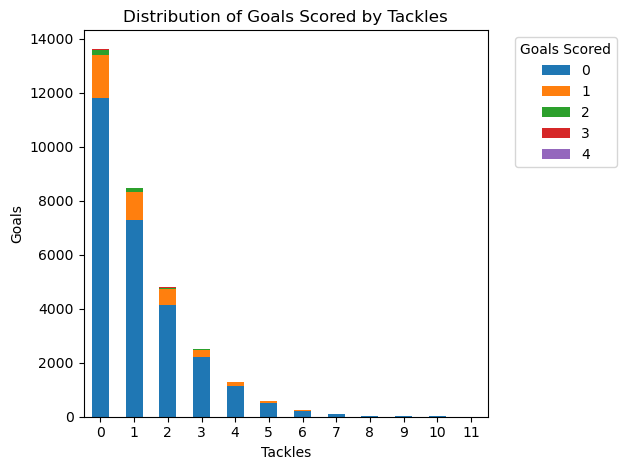

In [131]:
goals_by_tackles = att_explore.groupby(['Tackles', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Tackles')
ax.set_xlabel('Tackles')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

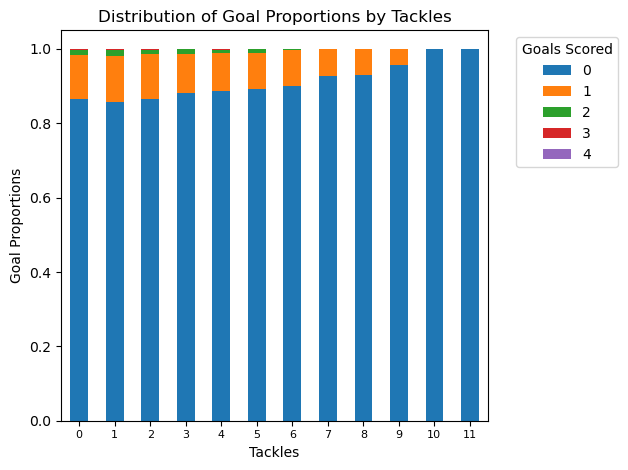

In [133]:
goalprop_by_tackles = goals_by_tackles.div(goals_by_tackles.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Tackles')
ax.set_xlabel('Tackles')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There seems to be a trend where the more tackles made, the lower the proportion of observations that scored at least 1 goal. As we mentioned at the beginning, we suspect this is to do with the fact that more defensive players (i.e. Defenders or Midfielders) are more likely to make more tackles, whilst simultaneously also being less likely to score goals. We can investigate this by plotting the frequency of tackles for defensive players (Defenders, Midfielders) and comparing this with the frequency of tackles for attacking players (AM, Wingers, FW)

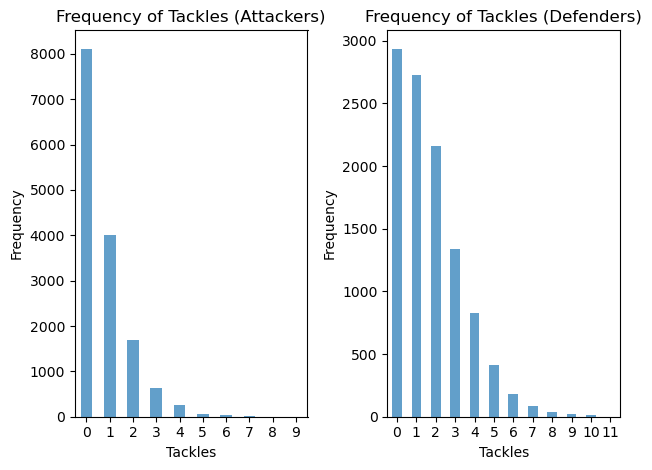

In [145]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_defdat = att_explore[attackers_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
attackers_tackles_count = attackers_defdat['Tackles'].value_counts().sort_index()


defenders_condition = (att_explore['Defenders'] == 1) | (att_explore['Midfielders'] == 1) | (att_explore['WB'] == 1)
defenders_defdat = att_explore[defenders_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
defenders_tackles_count = defenders_defdat['Tackles'].value_counts().sort_index()



fig, axes = plt.subplots(1, 2)

attackers_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Tackles')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Tackles (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Tackles')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Tackles (Defenders)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

When comparing the two plots, we can clearly see that the Attackers plot has observations that have generally recorded far fewer tackles compared to the observations in the Defenders plot. This confirms our initial suspicions about the relationship between 'Tackles' and the positions played by a given observation. 

#### Interceptions

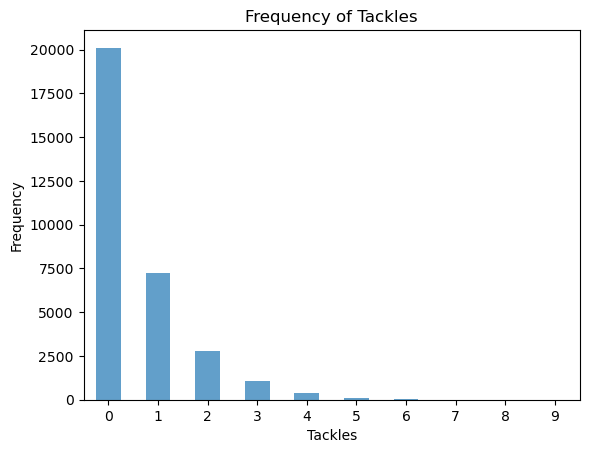

In [140]:
interceptions_count = att_explore['Interceptions'].value_counts().sort_index()

fig, ax = plt.subplots()

interceptions_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

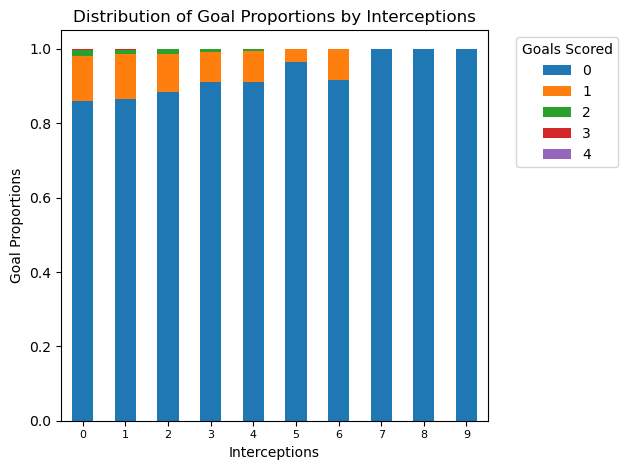

In [153]:
goals_by_interceptions = att_explore.groupby(['Interceptions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_interceptions = goals_by_interceptions.div(goals_by_interceptions.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_interceptions.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Interceptions')
ax.set_xlabel('Interceptions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

A similar pattern emerges where we see that the more interceptions is somewhat correlated with a fewer proportion of the observations scoring at least 1 goal. There does seem to be a weird kink in the pattern, where the proportion of goals scored by observations with 6 tackles is actually comparable to the proportion of goals scored by observations with 3 interceptions. We can have a closer look. 

In [144]:
att_explore[att_explore['Interceptions'] == 6]

,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,Goals,...,RB,RM,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage
19725,Sat,32,Away,W 2–1,Brighton,Arsenal,Y,CM,76,1,...,0,0,0,0,0,1,0,0,NaN,0.333333
37734,Sat,10,Away,L 0–3,Huddersfield,Liverpool,Y,CM,90,0,...,0,0,0,0,0,1,0,0,NaN,NaN
29533,Sat,27,Away,D 0–0,Watford,Manchester Utd,Y,CM,90,0,...,0,0,0,0,0,1,0,0,NaN,1.000000
14357,Sat,17,Away,W 1–0,Bournemouth,Chelsea,Y,CM,90,0,...,0,0,0,0,0,1,0,0,NaN,NaN
17029,Sun,20,Away,W 2–1,Chelsea,Arsenal,N,CM,57,1,...,0,0,0,0,0,1,0,0,NaN,1.000000
2058,Sat,24,Away,D 0–0,Aston Villa,Brighton,Y,DM,90,0,...,0,0,0,0,0,1,0,0,NaN,NaN
31898,Wed,17,Away,L 0–2,Brighton,Tottenham,Y,"LM,CM",90,0,...,0,0,0,0,0,1,1,0,NaN,0.000000
4699,Sat,4,Home,L 0–3,Everton,Tottenham,Y,"CM,DM",90,0,...,0,0,0,0,0,1,0,0,NaN,NaN
38752,Sun,28,Home,L 0–1,Crystal Palace,Tottenham,Y*,CM,90,0,...,0,0,0,0,0,1,0,0,NaN,NaN
8660,Sun,8,Away,W 4–1,Chelsea,Southampton,Y,RM,90,1,...,0,1,0,0,0,0,1,0,NaN,1.000000


As there are only 48 observations that have recorded exactly 6 interceptions, we can probably conclude that this anomaly is due to a small sample size, and shouldn't be attributed to the underlying data generating process. 

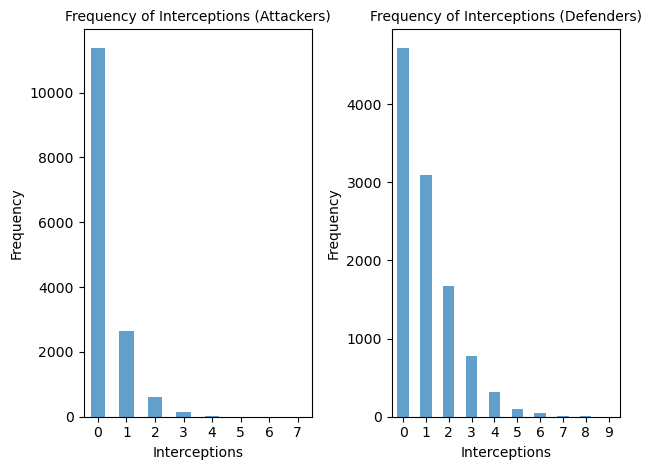

In [149]:
attackers_interceptions_count = attackers_defdat['Interceptions'].value_counts().sort_index()
defenders_interceptions_count = defenders_defdat['Interceptions'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Interceptions')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Interceptions (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Interceptions')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Interceptions (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We see a similar pattern where the frequency of interceptions is much greater for observations who have played in defensive positions. 

#### Blocks 

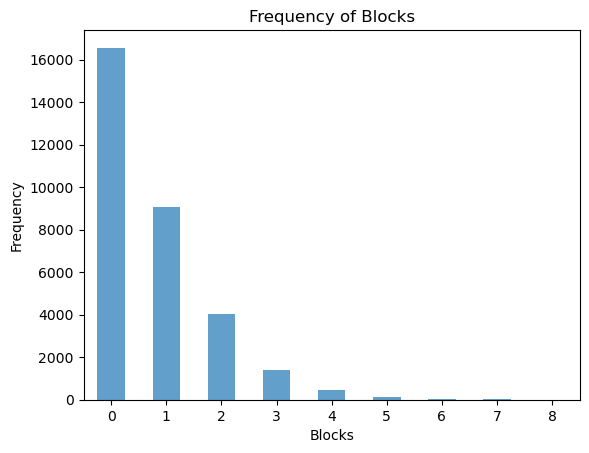

In [150]:
blocks_count = att_explore['Blocks'].value_counts().sort_index()

fig, ax = plt.subplots()

blocks_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Blocks')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Blocks')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

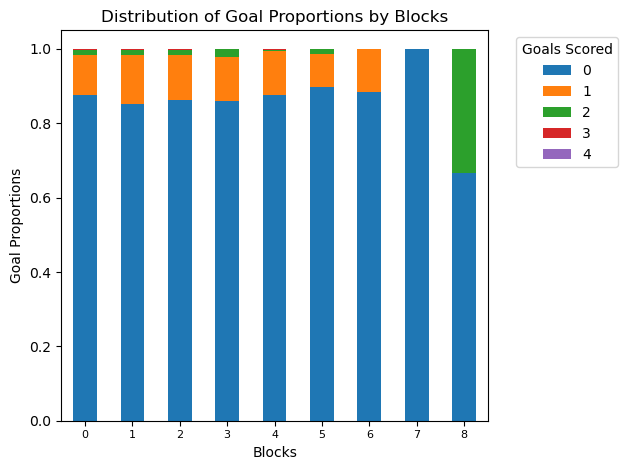

In [152]:
goals_by_blocks = att_explore.groupby(['Blocks', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_blocks = goals_by_blocks.div(goals_by_blocks.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_blocks.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Blocks')
ax.set_xlabel('Blocks')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Somewhat surprisingly, it doesn't appear to be any relationship between the number of blocks, and the proportion of observations that have scored at least one goal. The reason for this is unclear, perhaps there isn't such a distinct relationship between the number of blocks and position? 

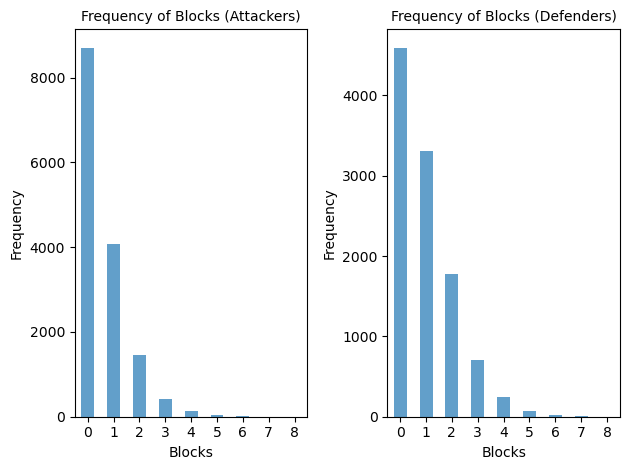

In [154]:
attackers_blocks_count = attackers_defdat['Blocks'].value_counts().sort_index()
defenders_blocks_count = defenders_defdat['Blocks'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Blocks')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Blocks (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Blocks (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The plots above don't seem to indicate that the distribution of 'Blocks' is similar when comparing defensive and attacking players. However, we can definitely say that the proportion of observations that have scored at least 1 goal is similar across different 'Blocks' values. Ultimately, this means that the number of Blocks made by a particular observation doesn't appear to have any significant relationship with the number of goals that are scored. 

### xG and npxG Feature Exploration

xG and npxG stand for Expected Goals and Non-Penalty Expected Goals respectively. For each shot that is taken, an xG value is given which classifies the probability of that shot resulting in a goal. For example, a shot with an xG value of 0.8 means that this shot will result in a goal 8 out of 10 times. We expect there to be a strong relationship between both xG and npxG and goals scored. 

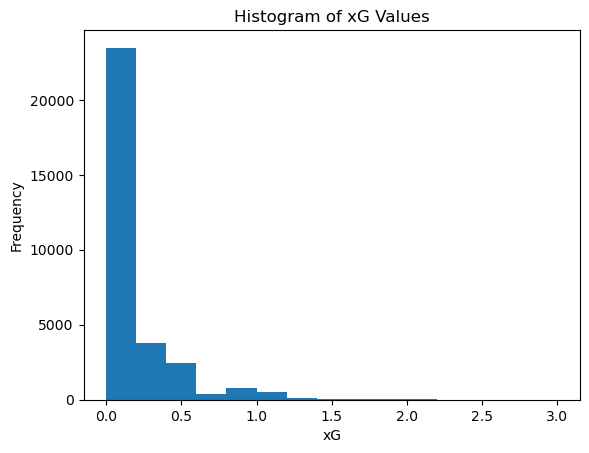

In [156]:
plt.figure()

plt.hist(att_explore['xG'], bins = 15)
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

We can see that majority of the xG values are situated around the 0 mark. There are also some extreme values of xG going up to 3. 

In [157]:
att_explore['xG'].max()

3.0

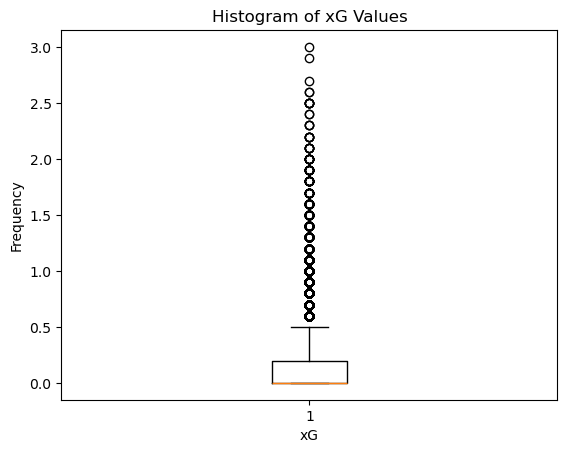

In [159]:
plt.figure()

plt.boxplot(att_explore['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

This boxplot doesn't really give us any additional information about the distribution of the 'xG' feature. We now know that there are a lot of xG values equal to or close to 0. We could try removing these values and replotting to see if we can get a better idea into the distribution of the non-zero xG values.

In [174]:
zero_xg_pct = (att_explore['xG'] == 0).sum()/len(att_explore)*100
zero_xg_pct = round(zero_xg_pct, 2)

print(str(zero_xg_pct) + '% of the observations have xG values equal to zero')

52.21% of the observations have xG values equal to zero


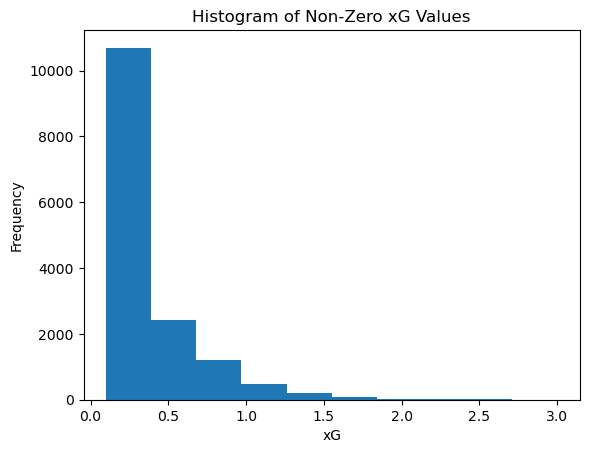

In [177]:
nonzero_xgdat = att_explore[att_explore['xG'] != 0]


plt.figure()

plt.hist(nonzero_xgdat['xG'], bins = 10)
plt.title('Histogram of Non-Zero xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

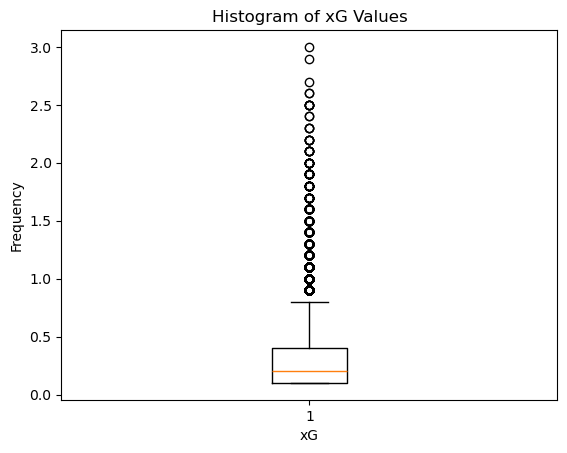

In [176]:
plt.figure()

plt.boxplot(nonzero_xgdat['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

So even when removing all of the observations with xG = 0, we can still see that the xG values are heavily right-skewed. Let's now take a look at the box plots when the non-zero xG observations are sorted by the number of goals scored. 

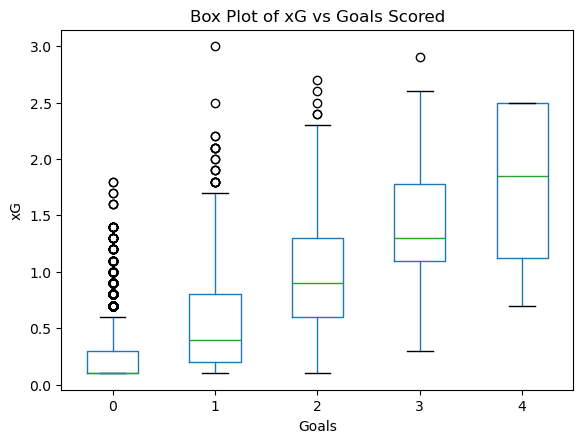

In [178]:
plt.figure
nonzero_xgdat.boxplot(column = 'xG', by = 'Goals', grid = False)
plt.title('Box Plot of xG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('xG')
plt.show()

We can see a very clear pattern showing us that the median value of xG is increasing by the number of goals scored. This gives us reason to believe that xG is an important predictor of Goals. 